# 주식 예측(Naver)

1. 시계열 데이터 준비

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import os

ts = pd.read_csv('/content/drive/MyDrive/AIFFEL/EXP/naver.csv', index_col='Date', parse_dates = True)

open = ts['Open']
high = ts['High']
low = ts['Low']
close = ts['Close']
adj = ts['Adj Close']
print(type(open))
open.head()

<class 'pandas.core.series.Series'>


Date
2018-04-30    144200.0
2018-05-02    145200.0
2018-05-03    147800.0
2018-05-04    145000.0
2018-05-08    145400.0
Name: Open, dtype: float64

2. 각종 전처리 - 결측치 처리, 로그 변환

In [4]:
open = open.interpolate(method = 'time')
open[open.isna()]
high = high.interpolate(method = 'time')
high[high.isna()]
low = low.interpolate(method = 'time')
low[low.isna()]
close = close.interpolate(method = 'time')
close[close.isna()]
adj = adj.interpolate(method = 'time')
adj[adj.isna()]

Series([], Name: Adj Close, dtype: float64)

In [5]:
open_log = np.log(open)
high_log = np.log(high)
low_log = np.log(low)
close_log = np.log(close)
adj_log = np.log(adj)

3. 시계열 안정성 분석

* 정성적 그래프 분석
* 정량적 Augmented Dicky_Fuller Test
* 시계열 분해(Time Series Decomposition)

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)


def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


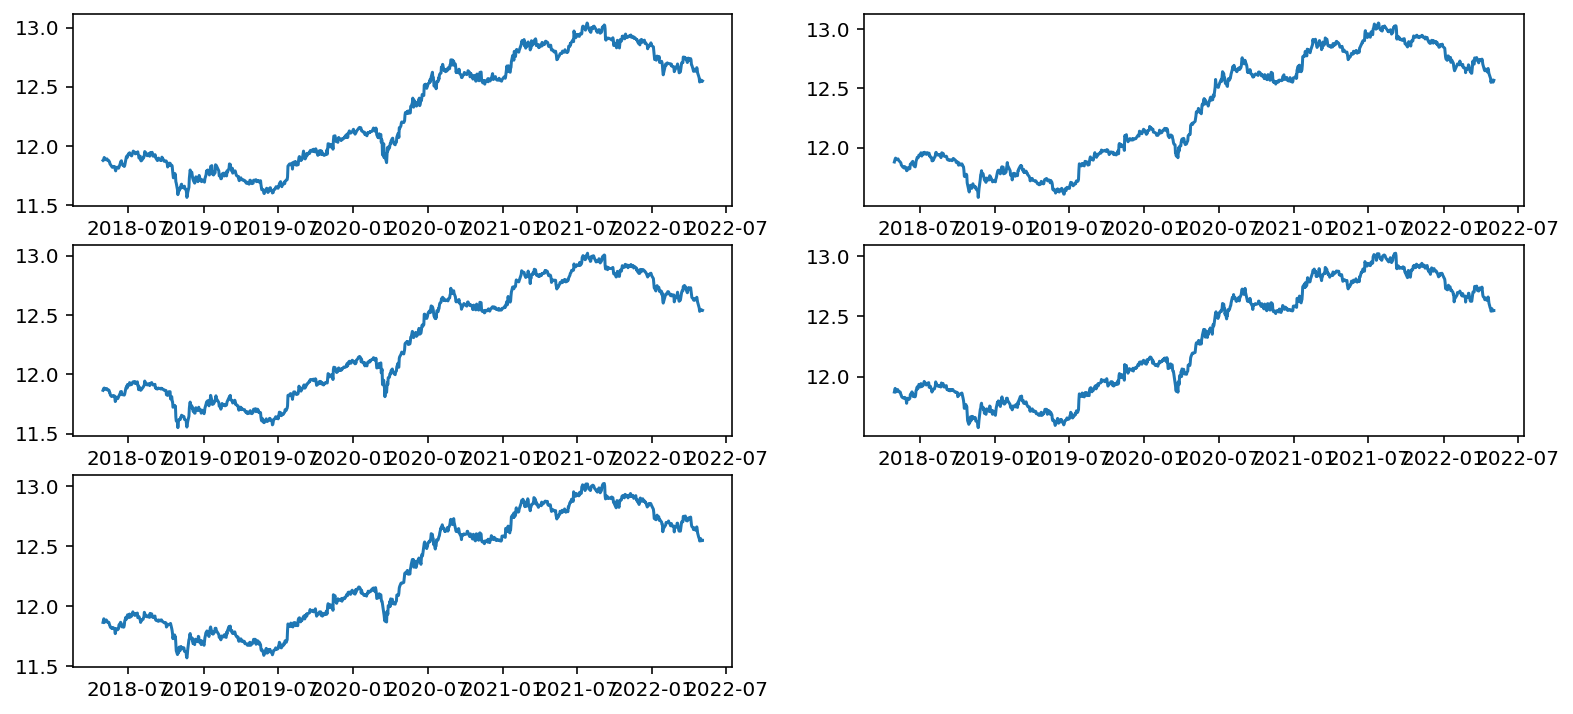

In [7]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6
plt.subplot(3, 2, 1)   
plt.plot(open_log)
plt.subplot(3, 2, 2)
plt.plot(high_log)
plt.subplot(3, 2, 3)
plt.plot(low_log)
plt.subplot(3, 2, 4)
plt.plot(close_log)
plt.subplot(3, 2, 5)
plt.plot(adj_log)

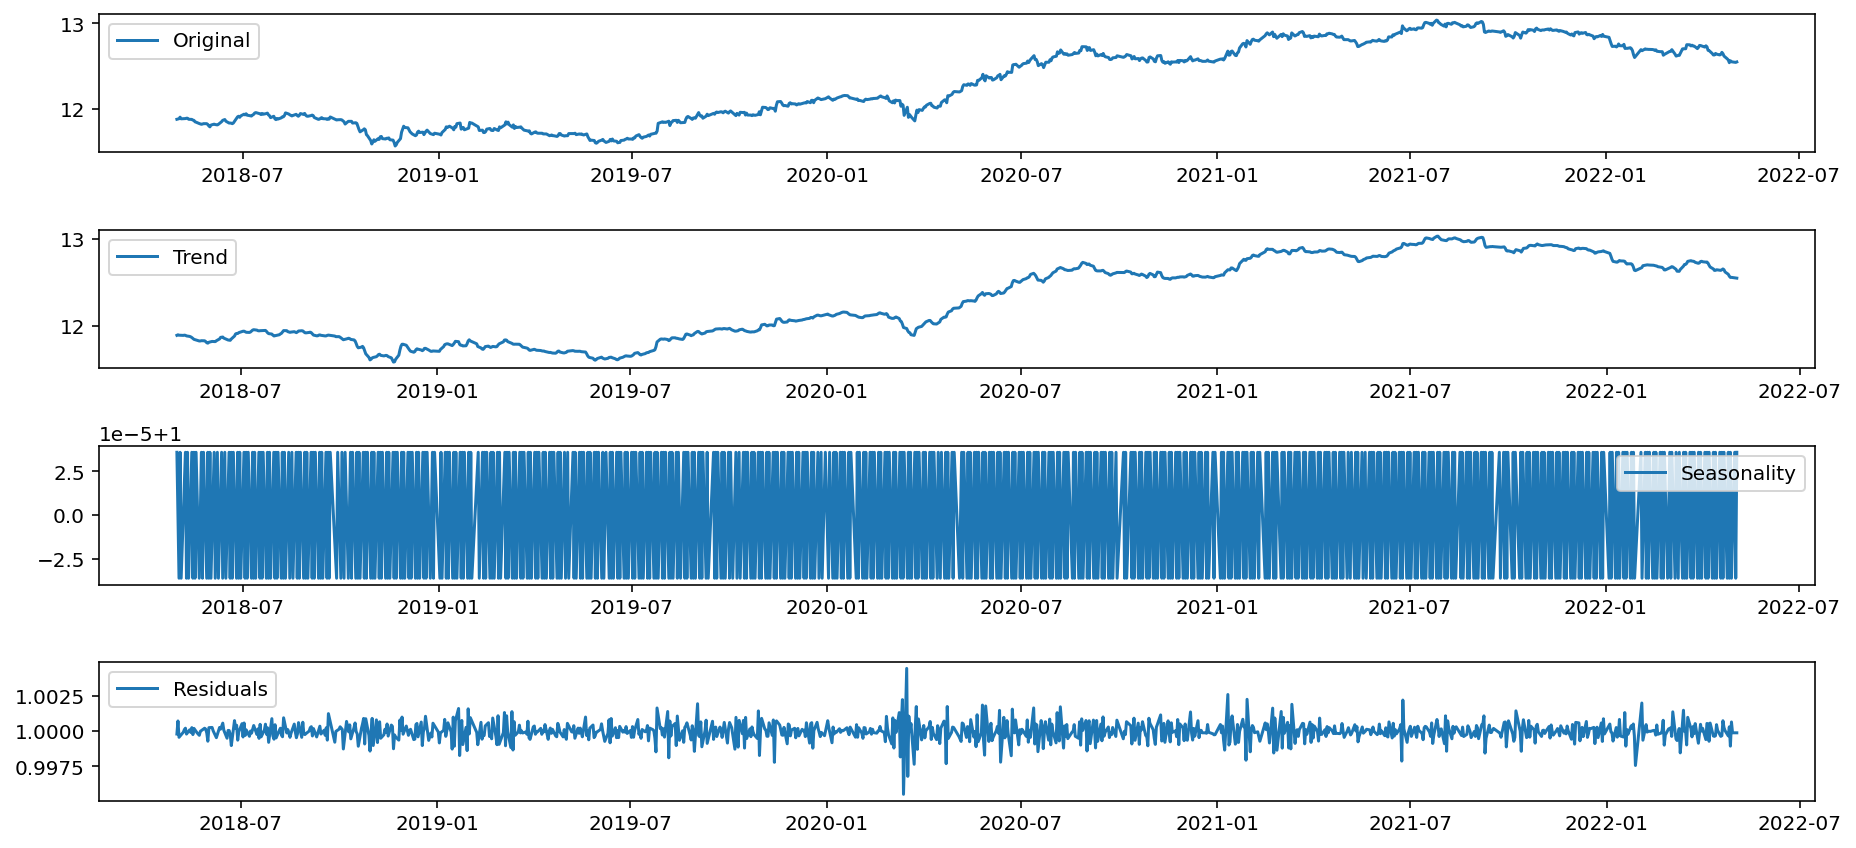

In [8]:
open_log.interpolate(inplace = True)
decomposition = seasonal_decompose(open_log, model='multiplicative', freq =2) 

trend_open = decomposition.trend
seasonal_open = decomposition.seasonal
residual_open = decomposition.resid


plt.subplot(411)
plt.plot(open_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_open, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_open,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_open, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [9]:
residual_open.dropna(inplace=True)
augmented_dickey_fuller_test(residual_open)

Results of Dickey-Fuller Test:
Test Statistic                -1.433468e+01
p-value                        1.085102e-26
#Lags Used                     1.600000e+01
Number of Observations Used    9.680000e+02
Critical Value (1%)           -3.437123e+00
Critical Value (5%)           -2.864530e+00
Critical Value (10%)          -2.568362e+00
dtype: float64


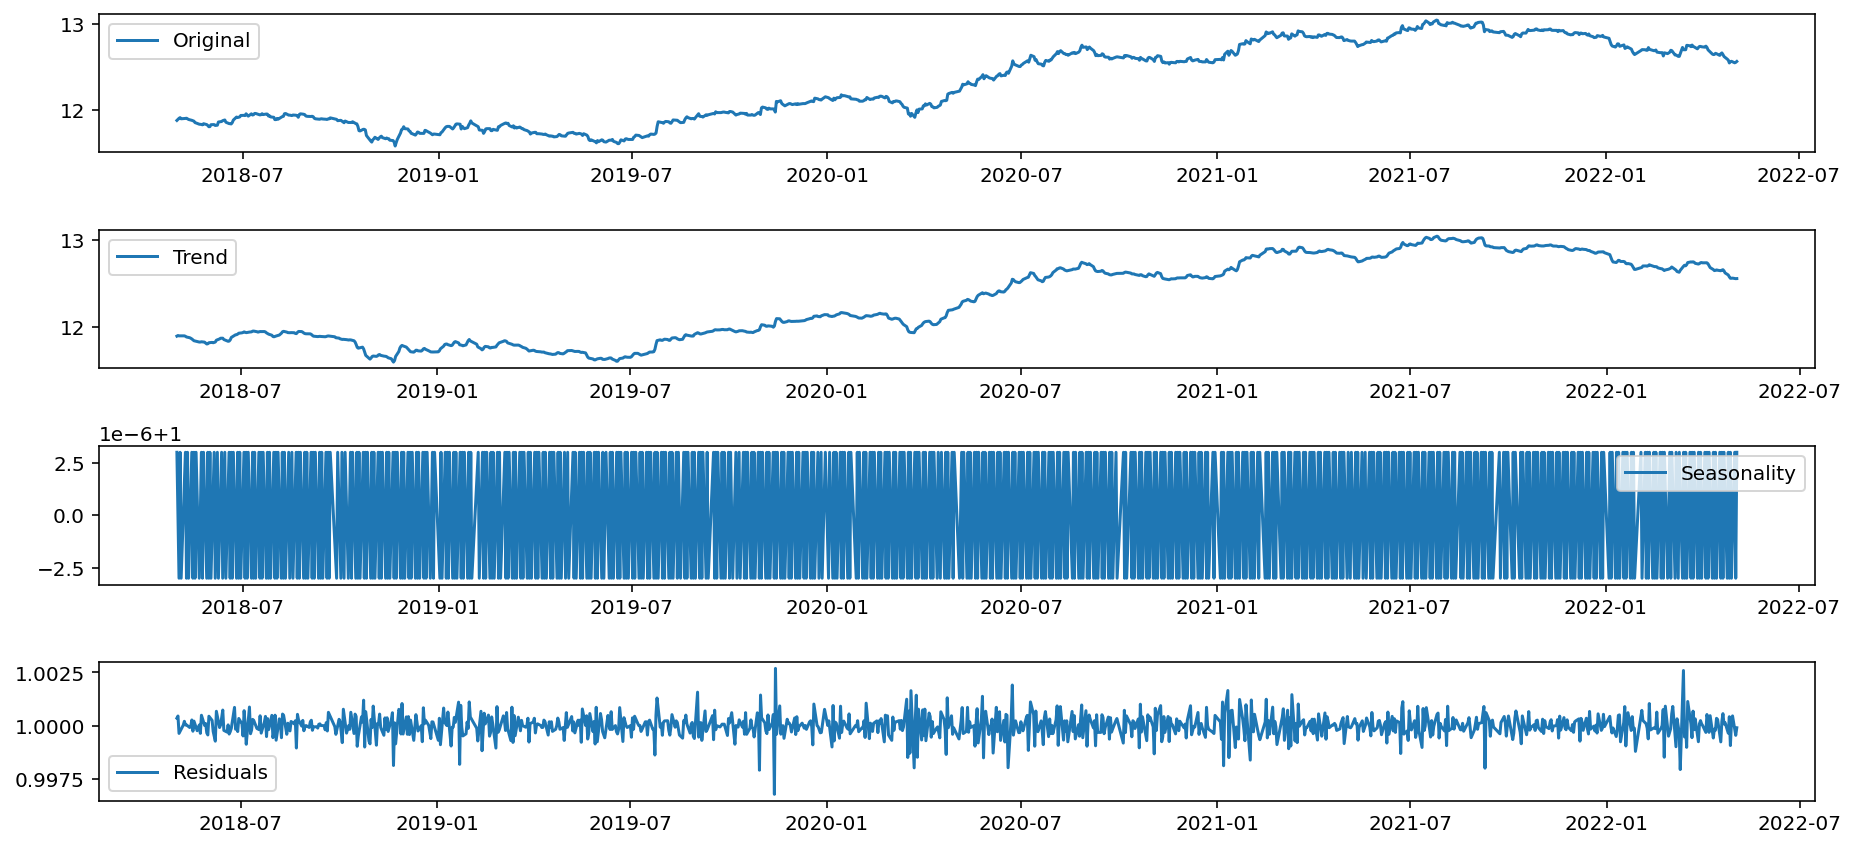

In [10]:
high_log.interpolate(inplace = True)
decomposition = seasonal_decompose(high_log, model='multiplicative', freq =2) 

trend_high = decomposition.trend
seasonal_high = decomposition.seasonal
residual_high = decomposition.resid


plt.subplot(411)
plt.plot(high_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_high, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_high,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_high, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [11]:
residual_high.dropna(inplace=True)
augmented_dickey_fuller_test(residual_high)

Results of Dickey-Fuller Test:
Test Statistic                -1.566695e+01
p-value                        1.529367e-28
#Lags Used                     1.500000e+01
Number of Observations Used    9.690000e+02
Critical Value (1%)           -3.437116e+00
Critical Value (5%)           -2.864527e+00
Critical Value (10%)          -2.568361e+00
dtype: float64


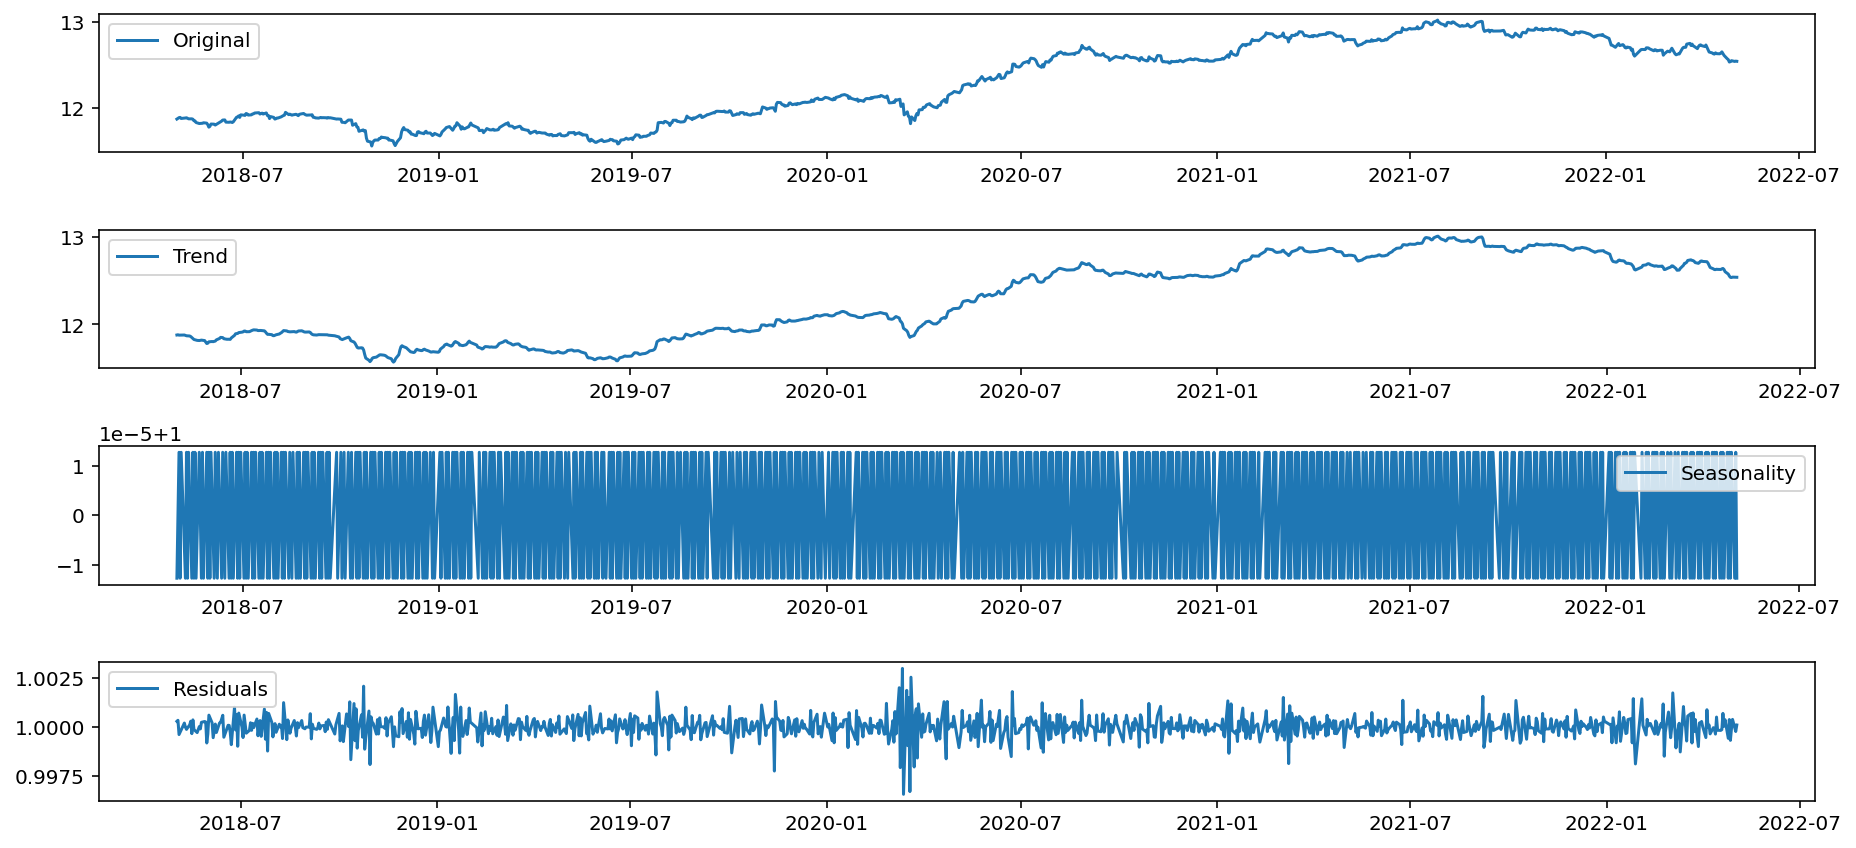

In [12]:
low_log.interpolate(inplace = True)
decomposition = seasonal_decompose(low_log, model='multiplicative', freq =2) 

trend_low = decomposition.trend
seasonal_low = decomposition.seasonal
residual_low = decomposition.resid


plt.subplot(411)
plt.plot(low_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_low, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_low,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_low, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [13]:
residual_low.dropna(inplace=True)
augmented_dickey_fuller_test(residual_low)

Results of Dickey-Fuller Test:
Test Statistic                -1.525765e+01
p-value                        4.910246e-28
#Lags Used                     1.500000e+01
Number of Observations Used    9.690000e+02
Critical Value (1%)           -3.437116e+00
Critical Value (5%)           -2.864527e+00
Critical Value (10%)          -2.568361e+00
dtype: float64


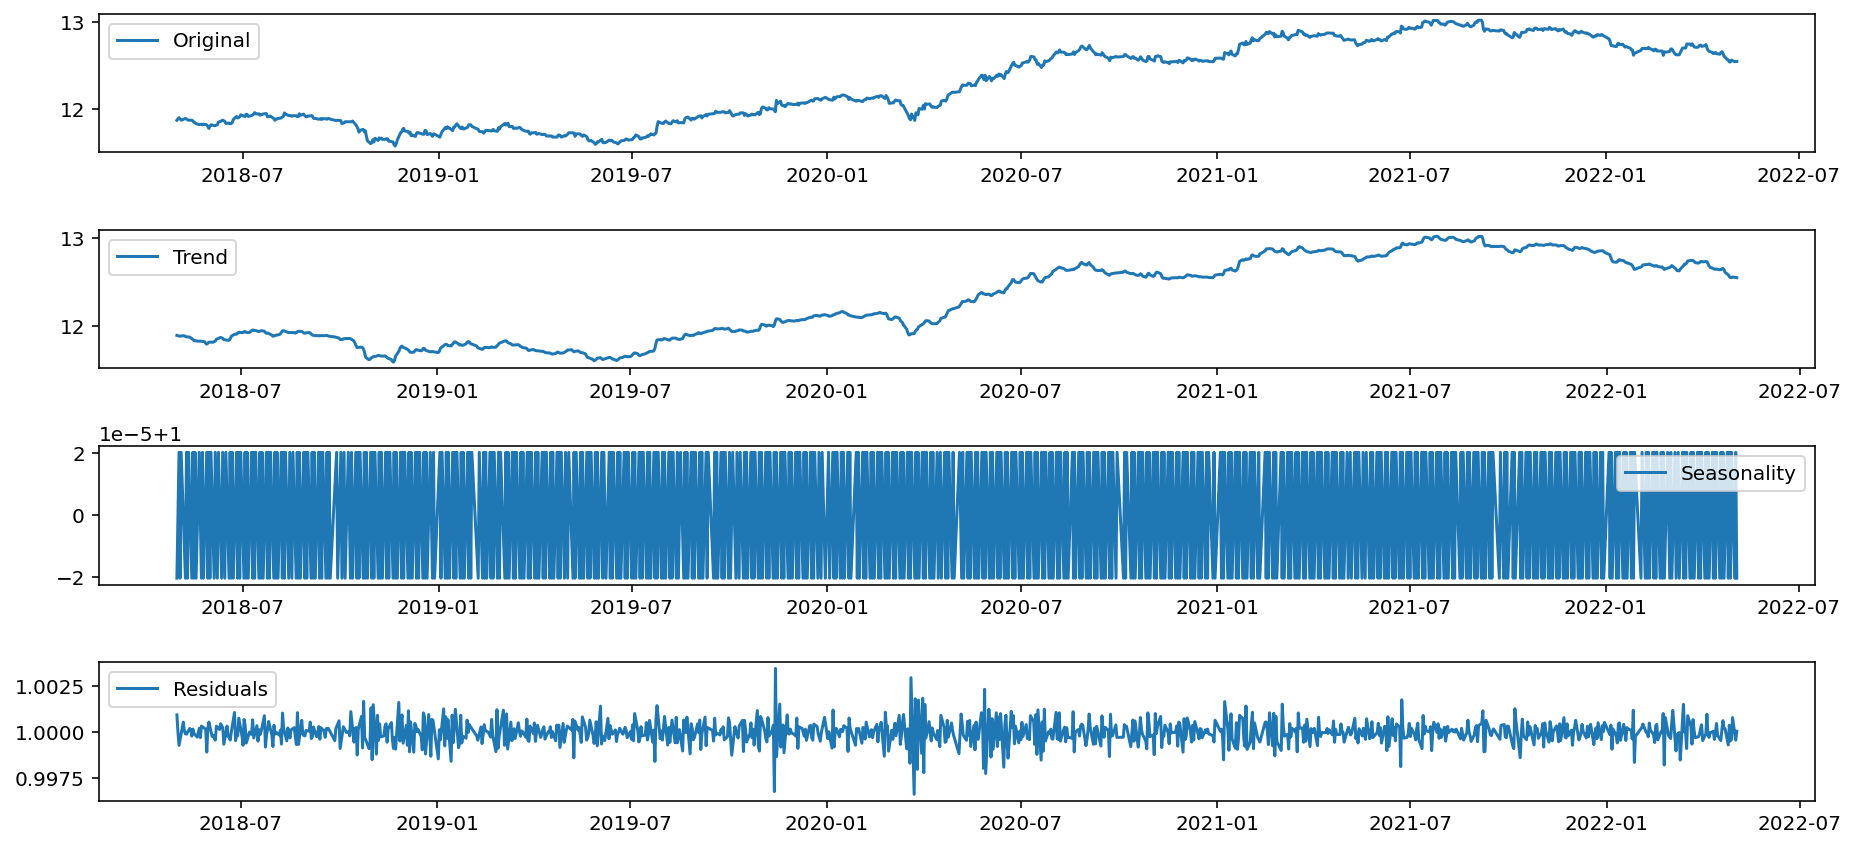

In [14]:
close_log.interpolate(inplace = True)
decomposition = seasonal_decompose(close_log, model='multiplicative', freq =2) 

trend_close = decomposition.trend
seasonal_close = decomposition.seasonal
residual_close = decomposition.resid


plt.subplot(411)
plt.plot(close_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_close, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_close,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_close, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

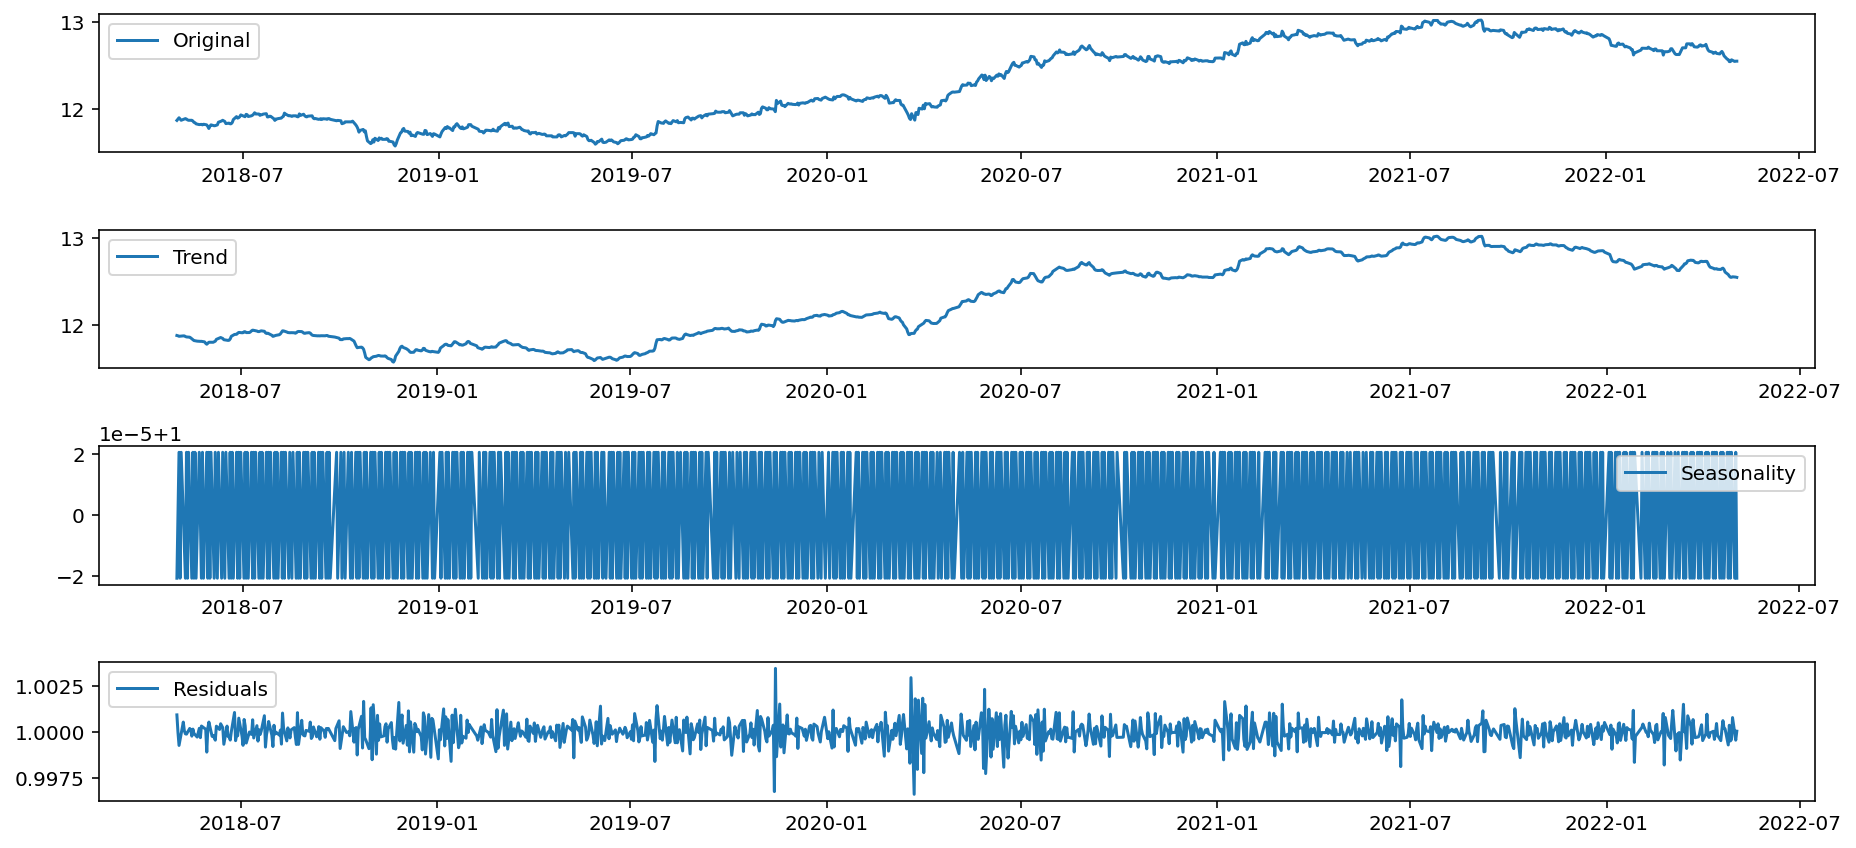

In [15]:
adj_log.interpolate(inplace = True)
decomposition = seasonal_decompose(adj_log, model='multiplicative', freq =2) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.subplot(411)
plt.plot(adj_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [16]:
residual_close.dropna(inplace=True)
augmented_dickey_fuller_test(residual_close)

Results of Dickey-Fuller Test:
Test Statistic                -1.432158e+01
p-value                        1.138886e-26
#Lags Used                     1.600000e+01
Number of Observations Used    9.680000e+02
Critical Value (1%)           -3.437123e+00
Critical Value (5%)           -2.864530e+00
Critical Value (10%)          -2.568362e+00
dtype: float64


원인은 잘 모르겠는데 너무 작은 값이 나와 이러는 것 같다.

4. 학습 Test Data Set 분리

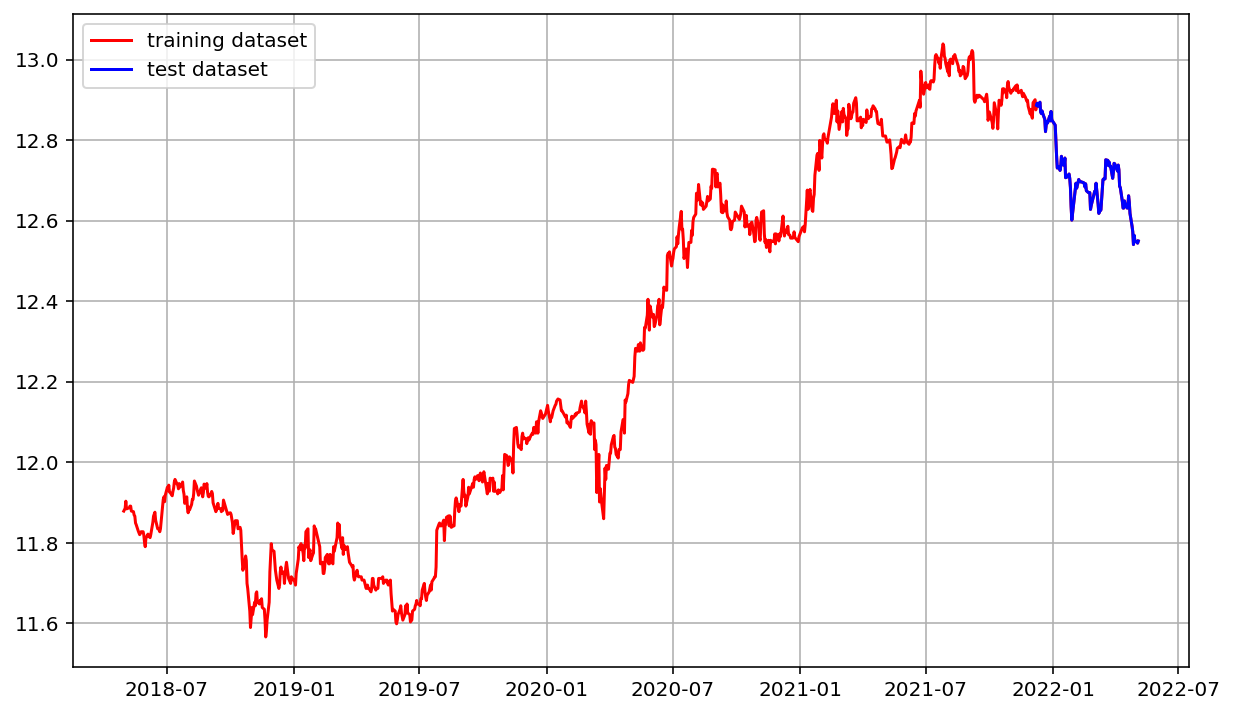

In [17]:
train_data_o, test_data_o = open_log[:int(len(open_log)*0.9)], open_log[int(len(open_log)*0.9):]
# train - 90 %, test - 10 %
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(open_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data_o, c='b', label='test dataset')
plt.legend()

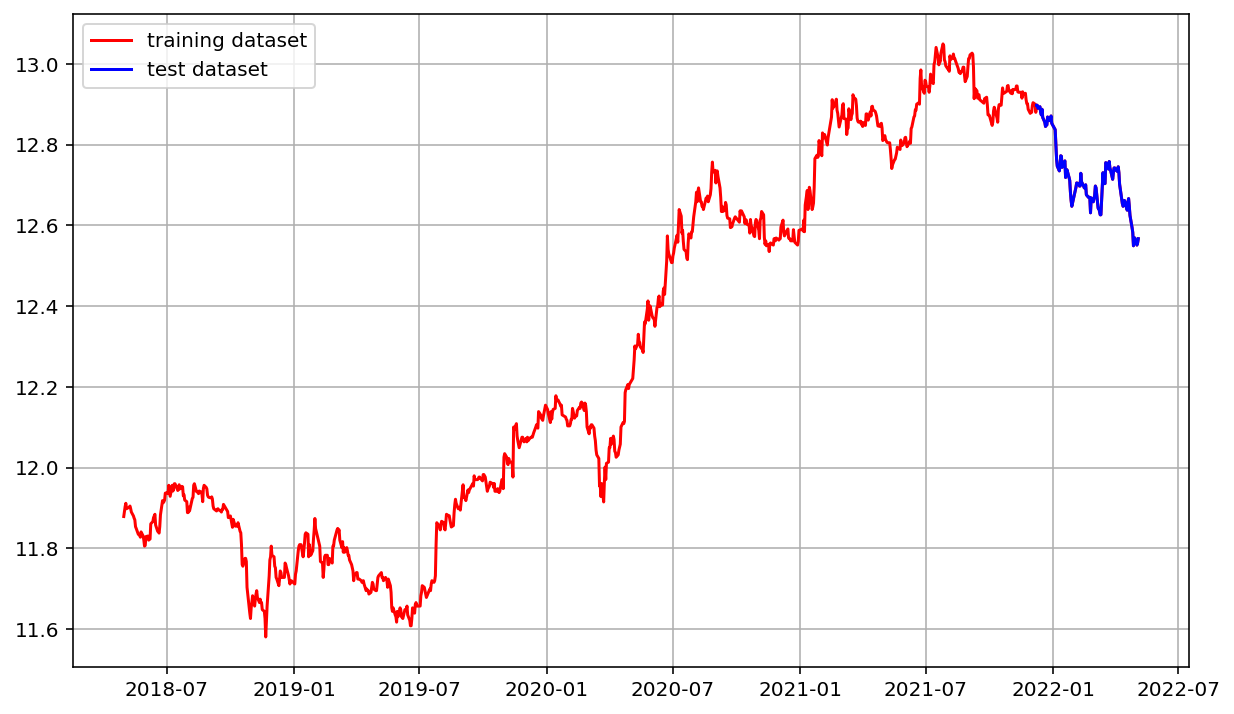

In [18]:
train_data_h, test_data_h = high_log[:int(len(high_log)*0.9)], high_log[int(len(high_log)*0.9):]
# train - 90 %, test - 10 %
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(high_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data_h, c='b', label='test dataset')
plt.legend()

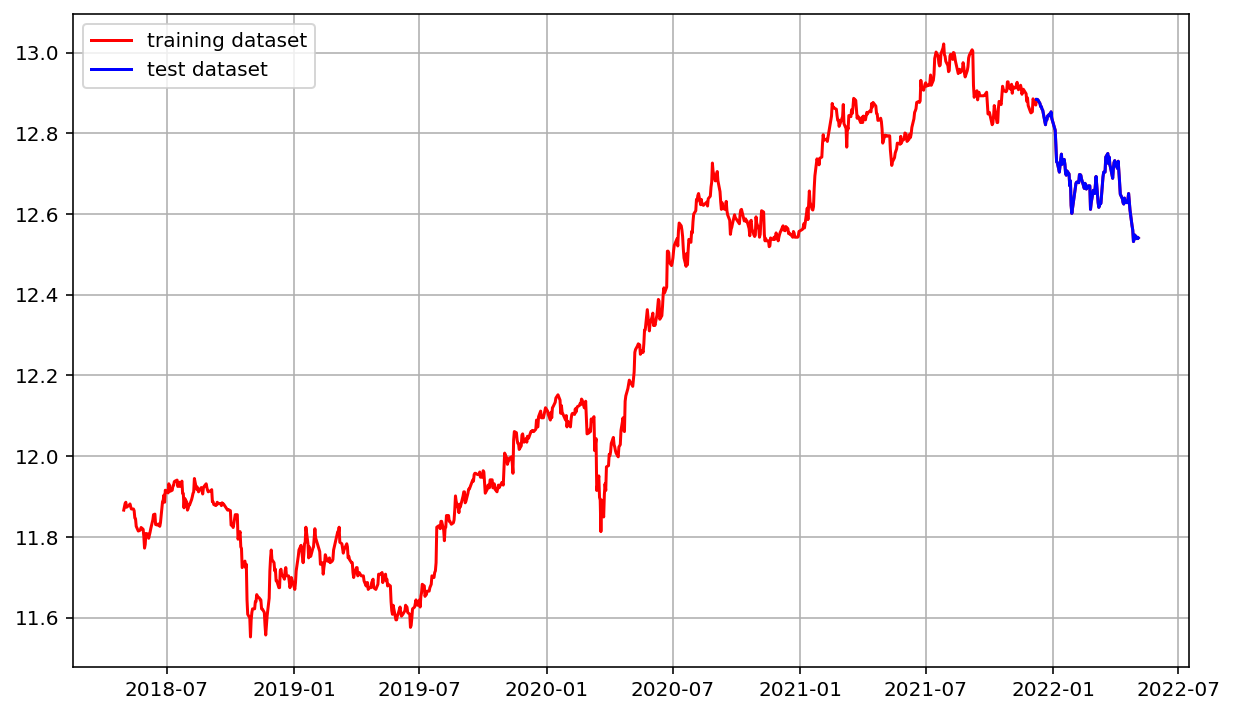

In [19]:
train_data_l, test_data_l = low_log[:int(len(low_log)*0.9)], low_log[int(len(low_log)*0.9):]
# train - 90 %, test - 10 %
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(low_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data_l, c='b', label='test dataset')
plt.legend()

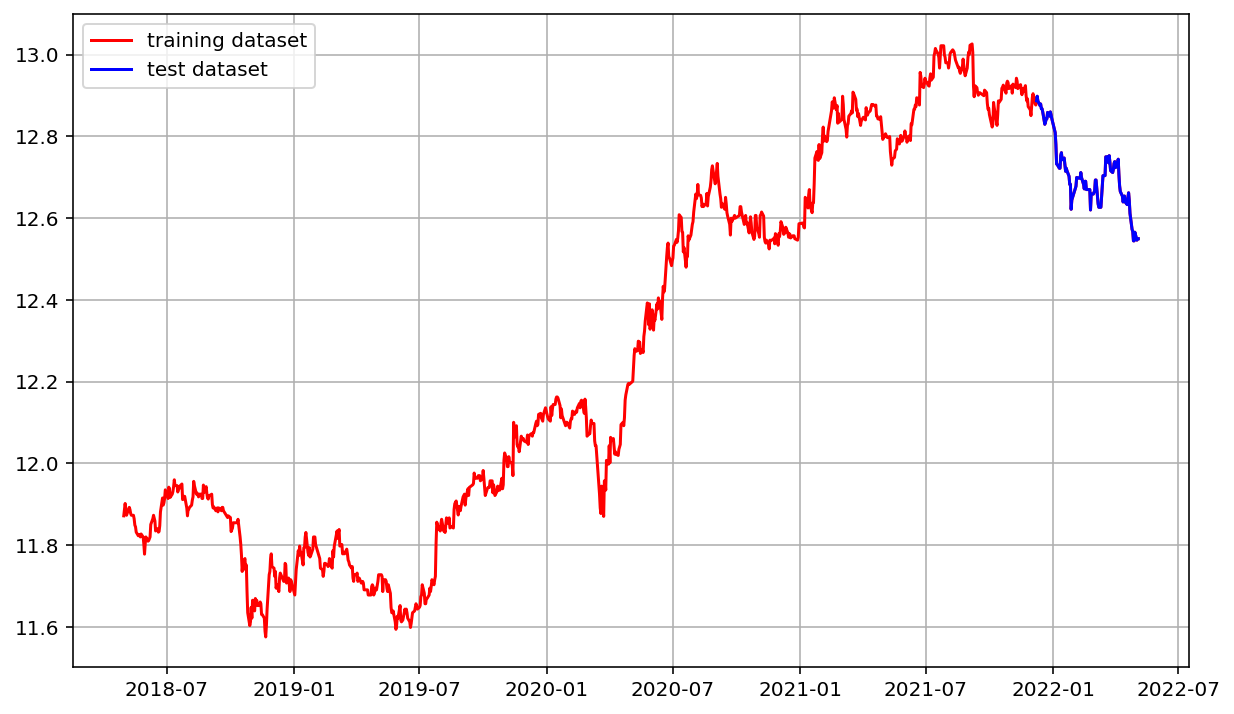

In [20]:
train_data_c, test_data_c = close_log[:int(len(close_log)*0.9)], close_log[int(len(close_log)*0.9):]
# train - 90 %, test - 10 %
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(close_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data_c, c='b', label='test dataset')
plt.legend()

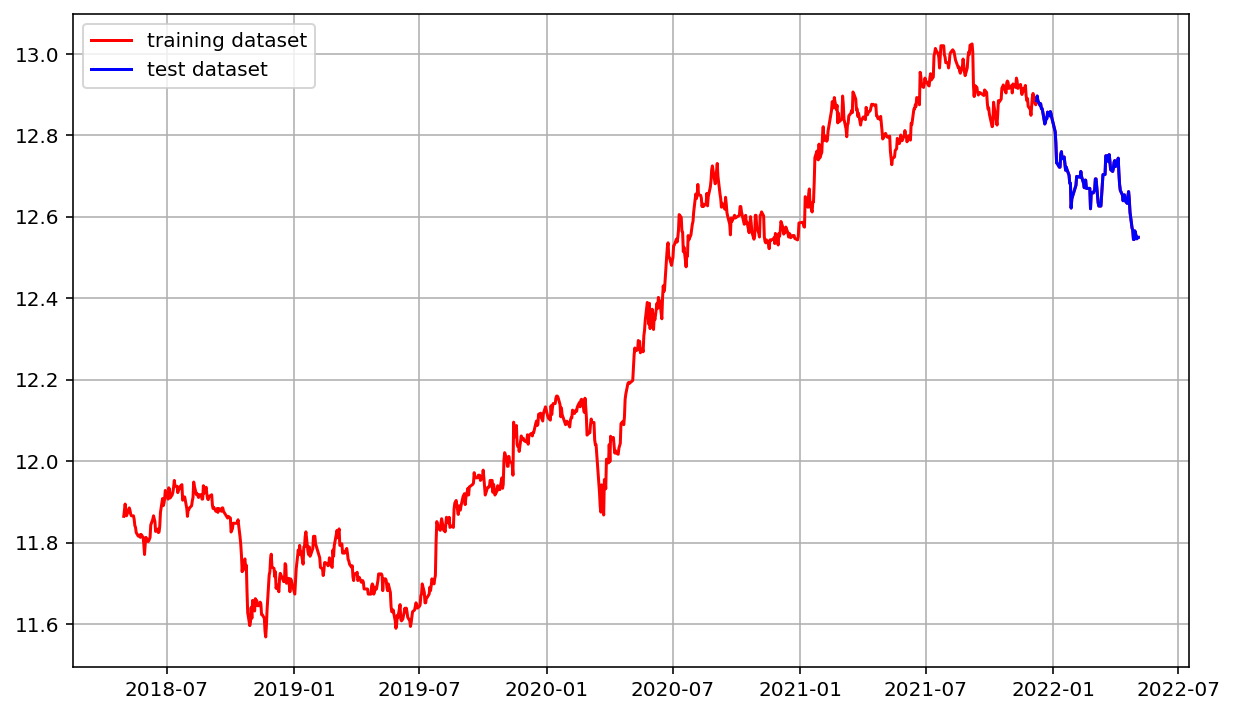

In [21]:
train_data_a, test_data_a = adj_log[:int(len(adj_log)*0.9)], adj_log[int(len(adj_log)*0.9):]
# train - 90 %, test - 10 %
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(adj_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data_a, c='b', label='test dataset')
plt.legend()

5. 적정 ARIMA 모수 찾기

ARIMA(Autoregressive Integrated Moving Average) 모델

AR(자기회귀, Autoregressive)
AR은 일반적인 시계열에서 Trend와 Seasonality를 제거한 Residual에 해당하는 부분을 모델링
주식값이 항상 일정한 균형 수준을 유지할 것이라고 예측하는 관점에 해당
I (차분누적, Integration)
I는 일반적인 시계열에서 Seasonality에 해당하는 부분을 모델링
이전 데이터와 d차 차분의 누적(integration) 합이라고 보는 모델
MA(이동평균, Moving Average)

MA는 일반적인 시계열에서 Trend에 해당하는 부분을 모델링
주식값은 항상 최근의 증감 패턴이 지속될 것이라고 예측하는 관점
ARIMA의 파라미터 p,d,q

자기회귀 모형(AR)의 시차를 의미하는 p, 차분(diffdrence) 횟수를 의미하는 d, 이동평균 모형(MA)의 시차를 의미하는 q
p + q < 2, p * q = 0 인 값들을 사용
ACF(Autocorrelation Function)와 PACF(Partial Autocorrelation Function)을 통해 결정가능함

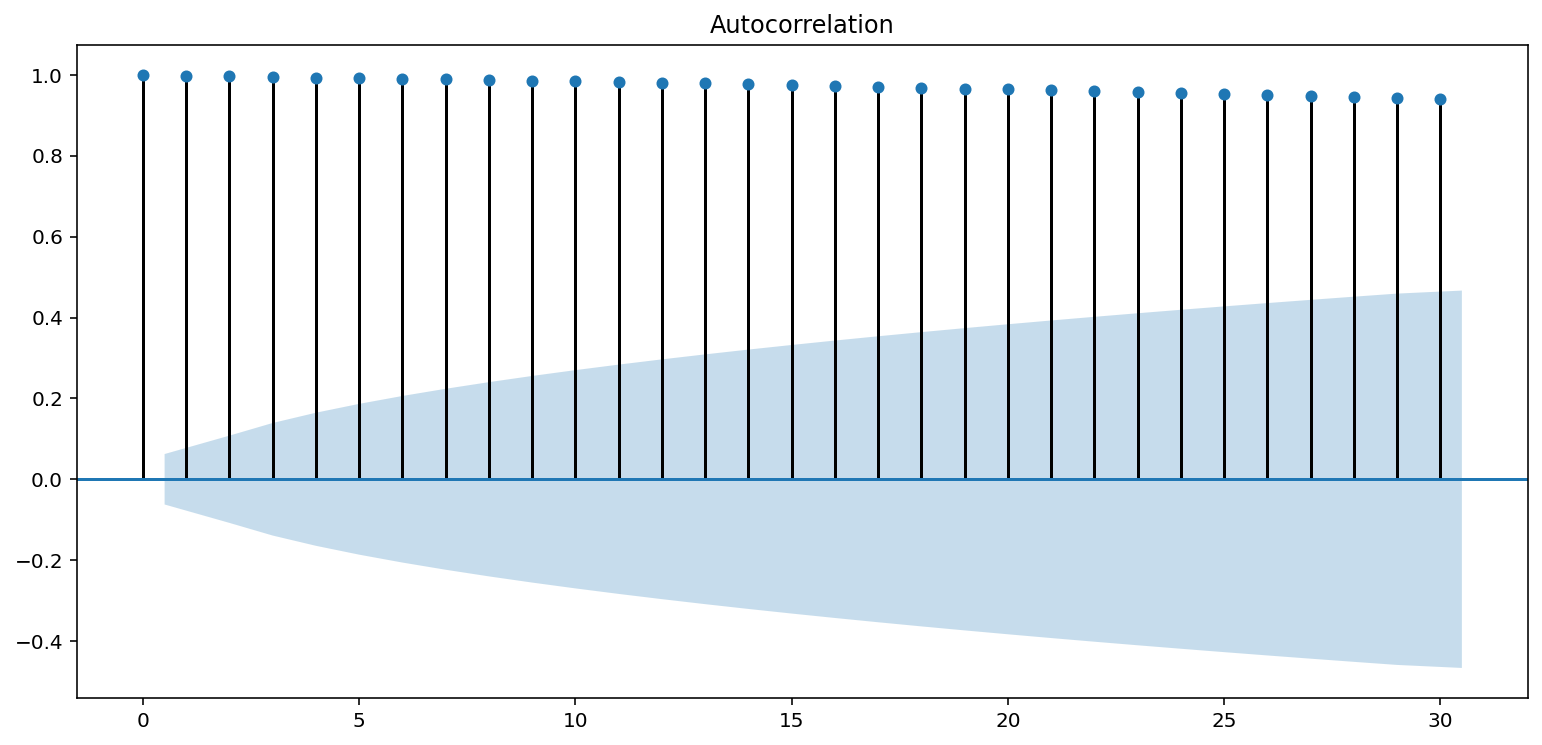

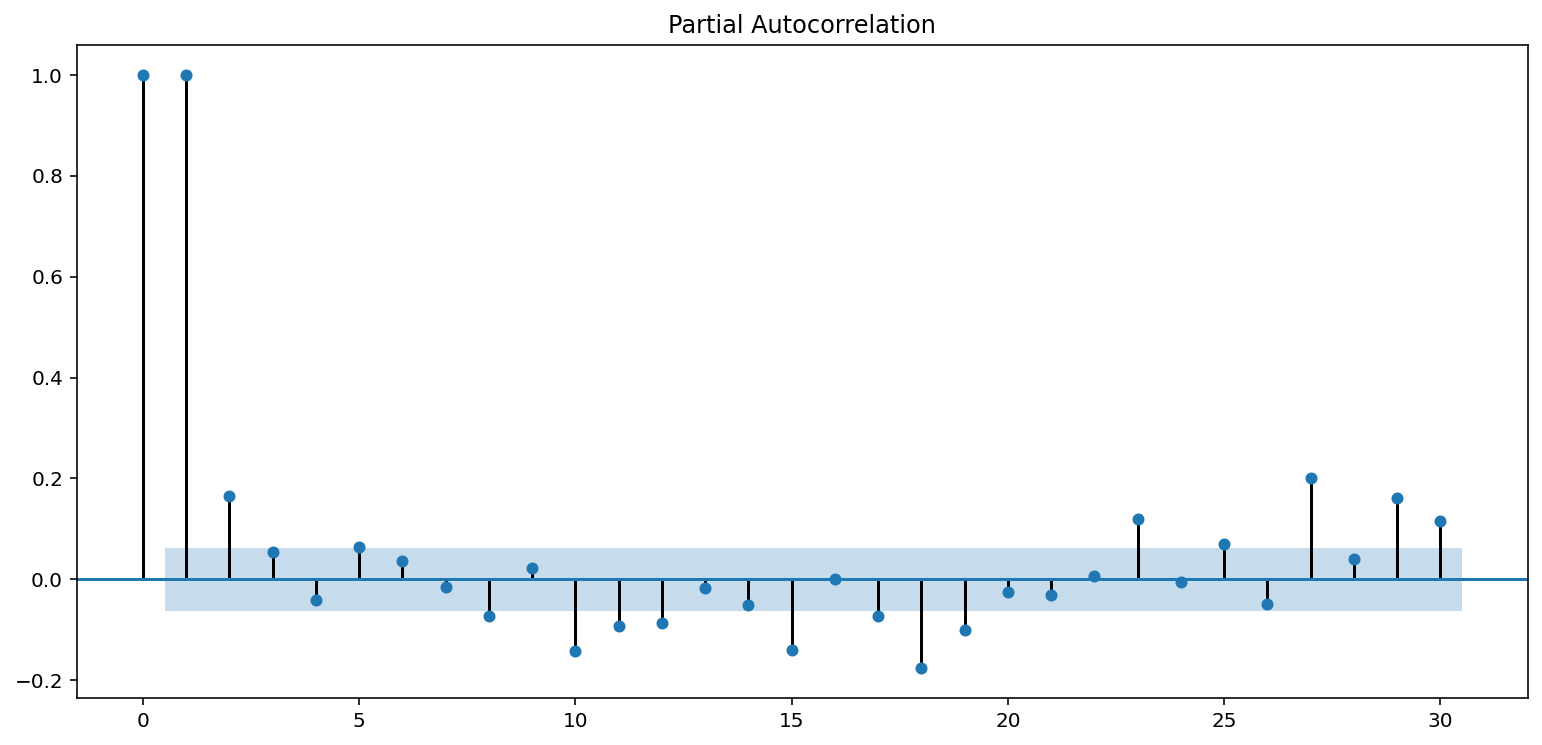

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(open_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(open_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

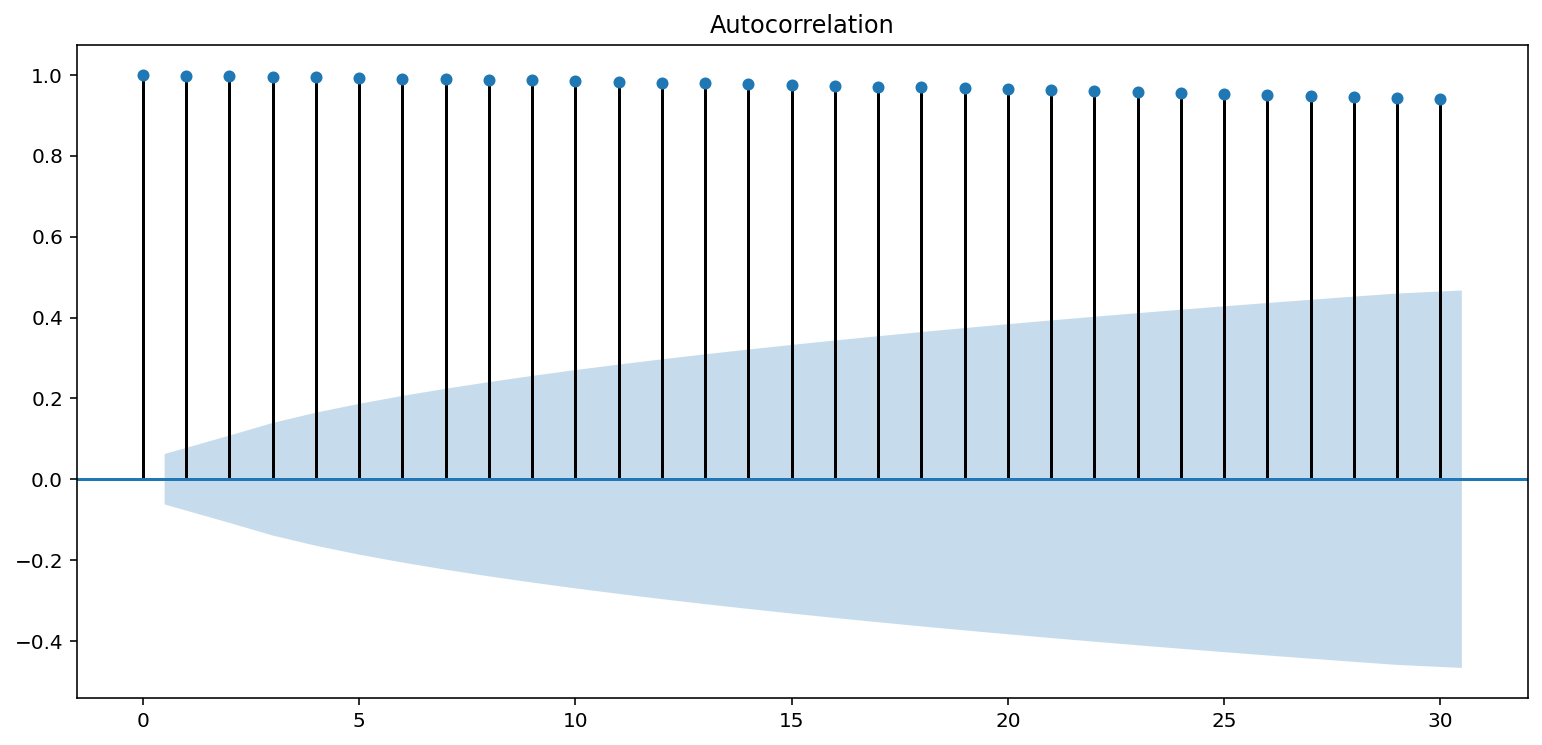

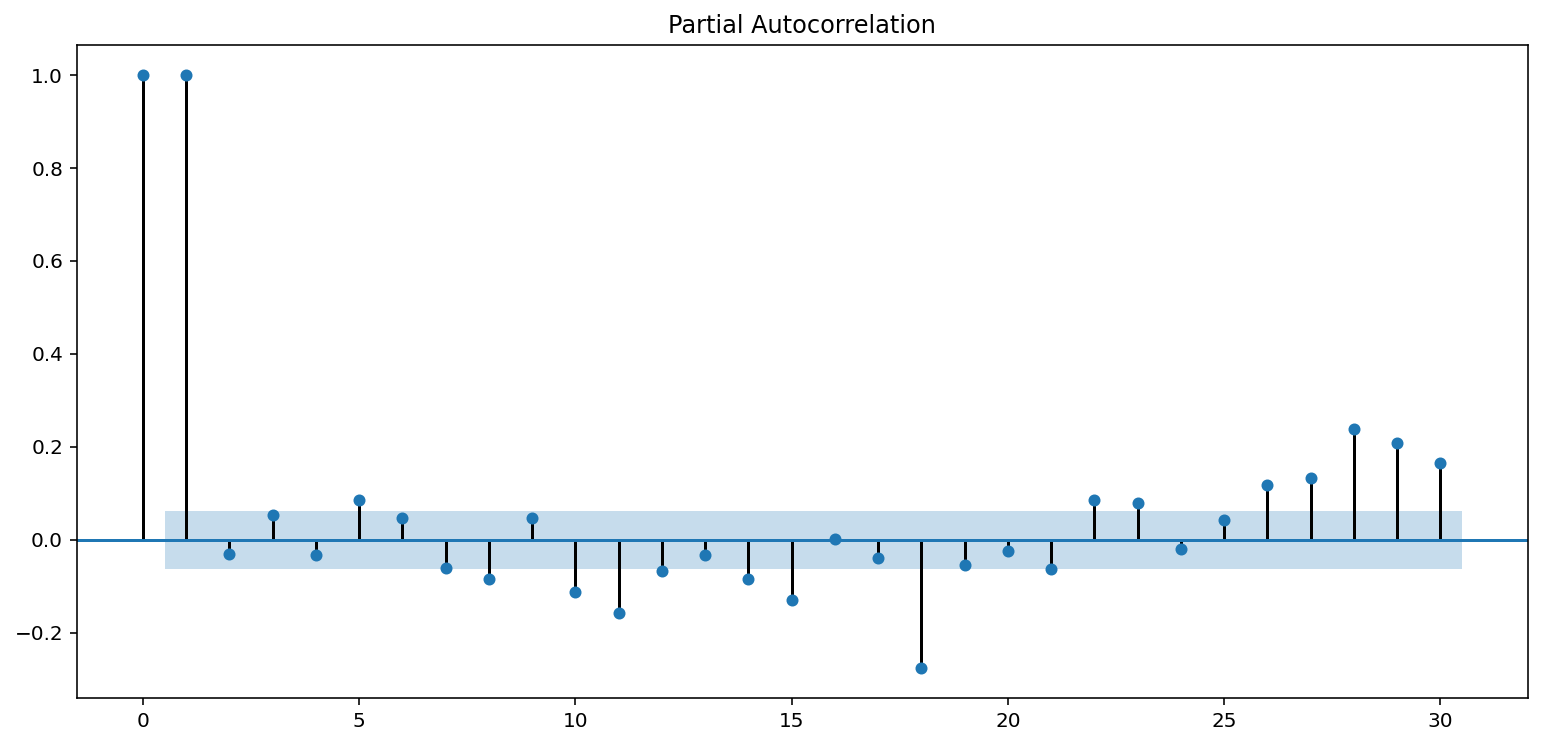

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(high_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(high_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

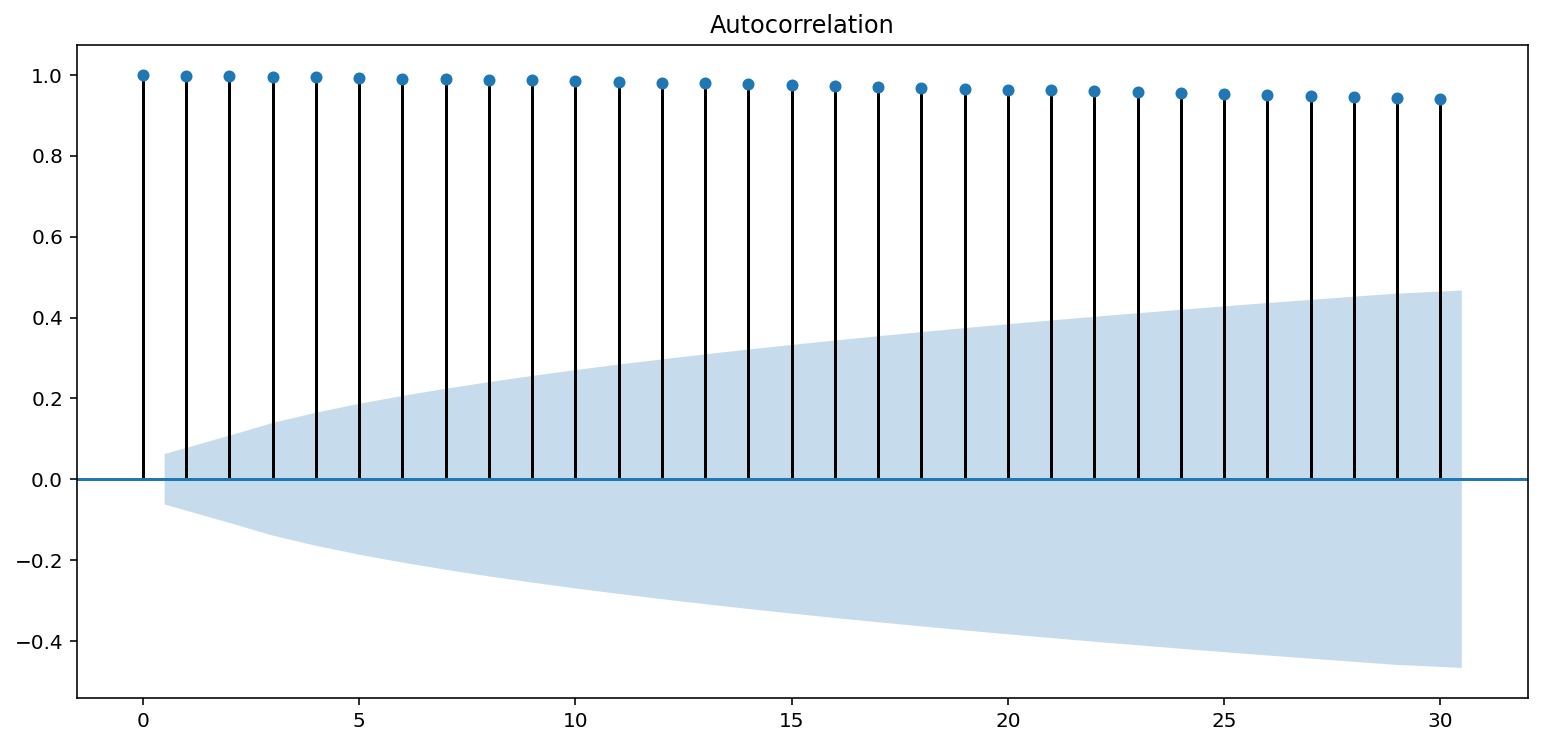

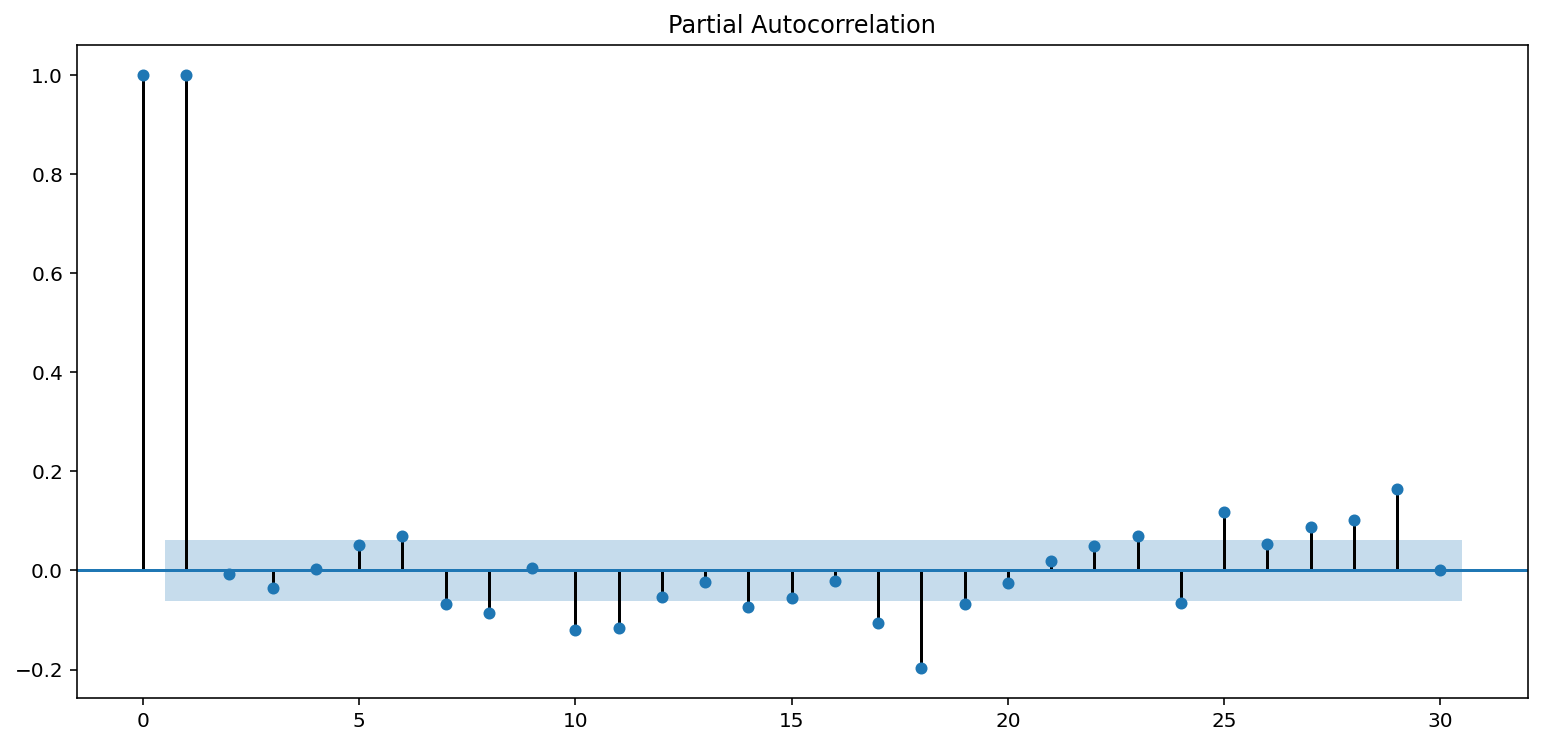

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(low_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(low_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

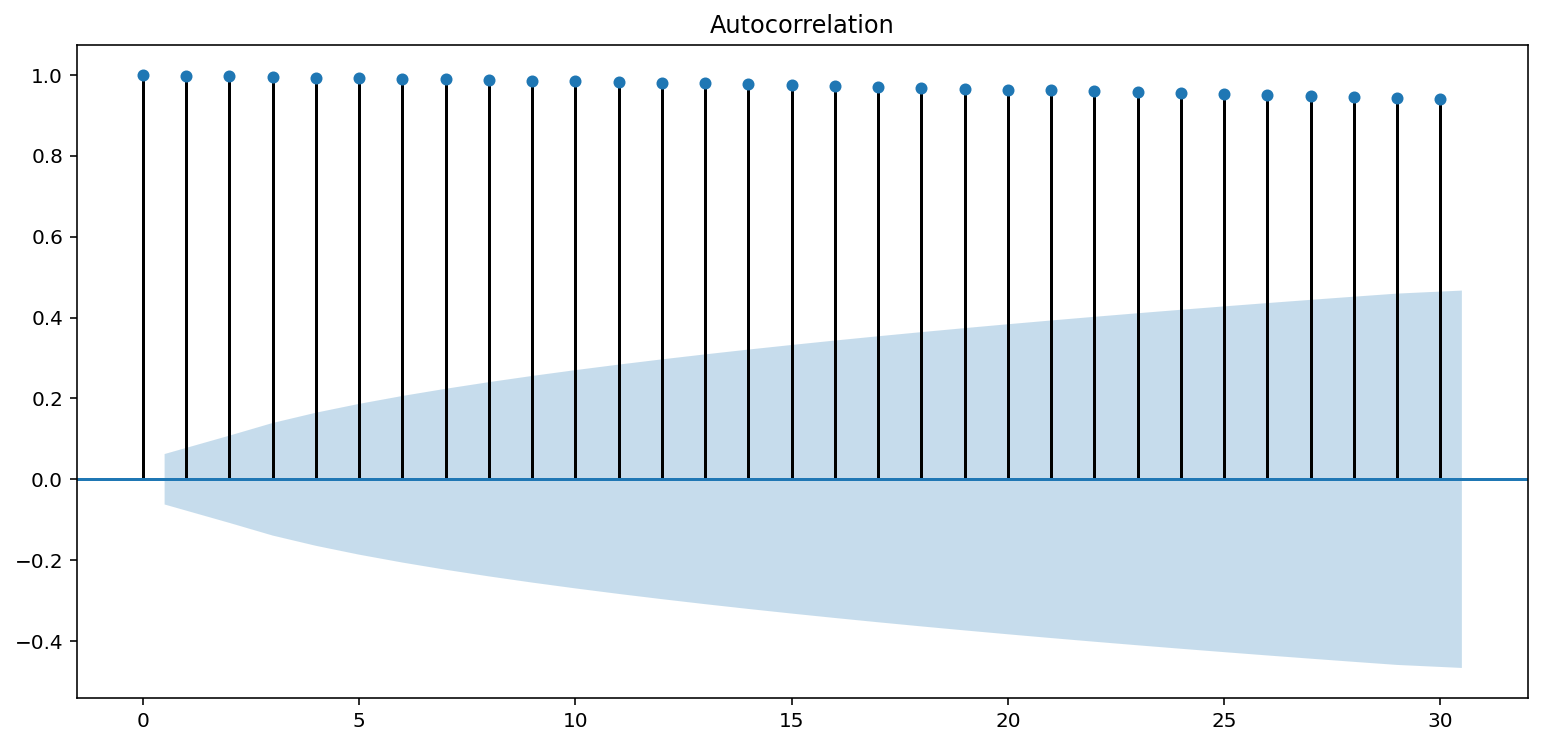

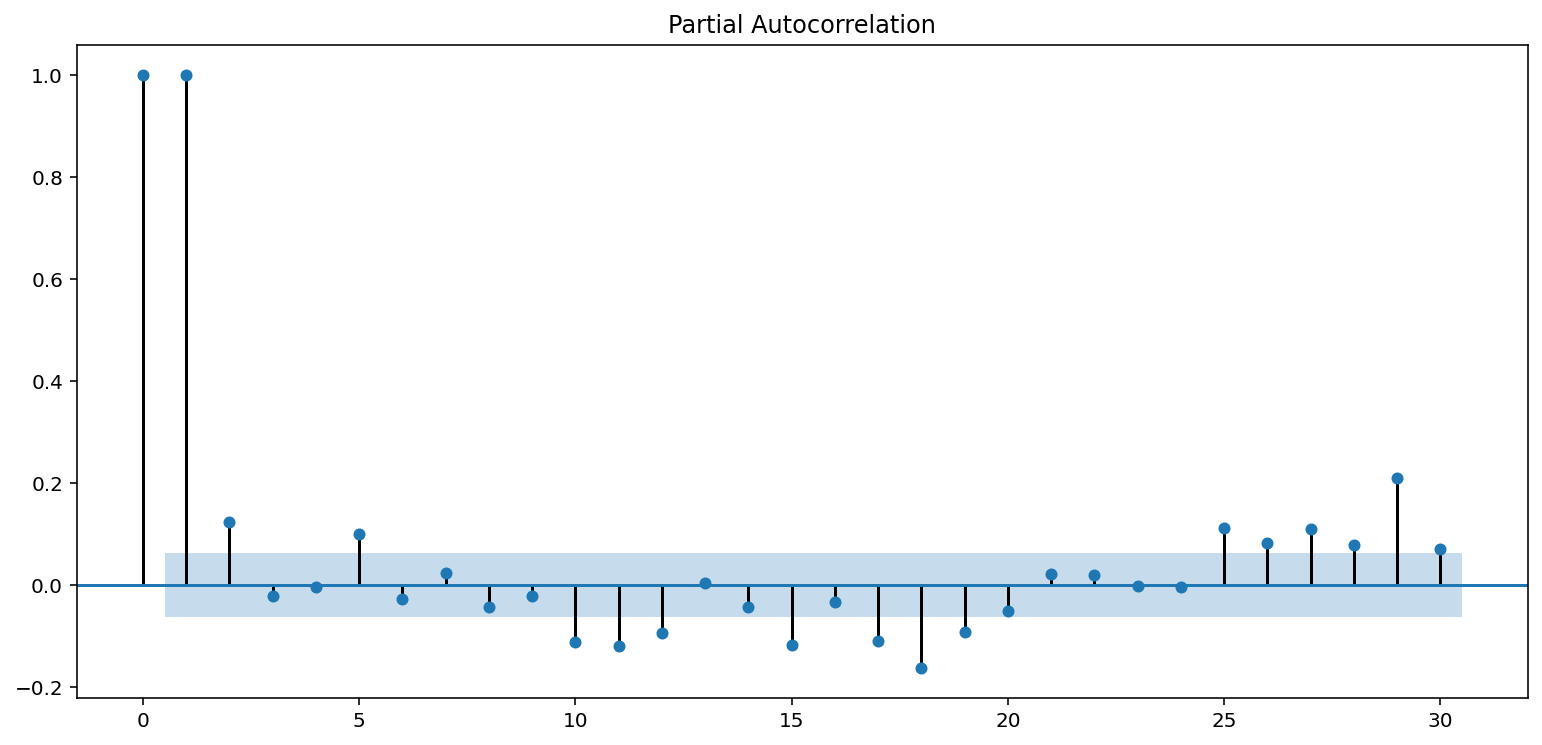

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(close_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(close_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

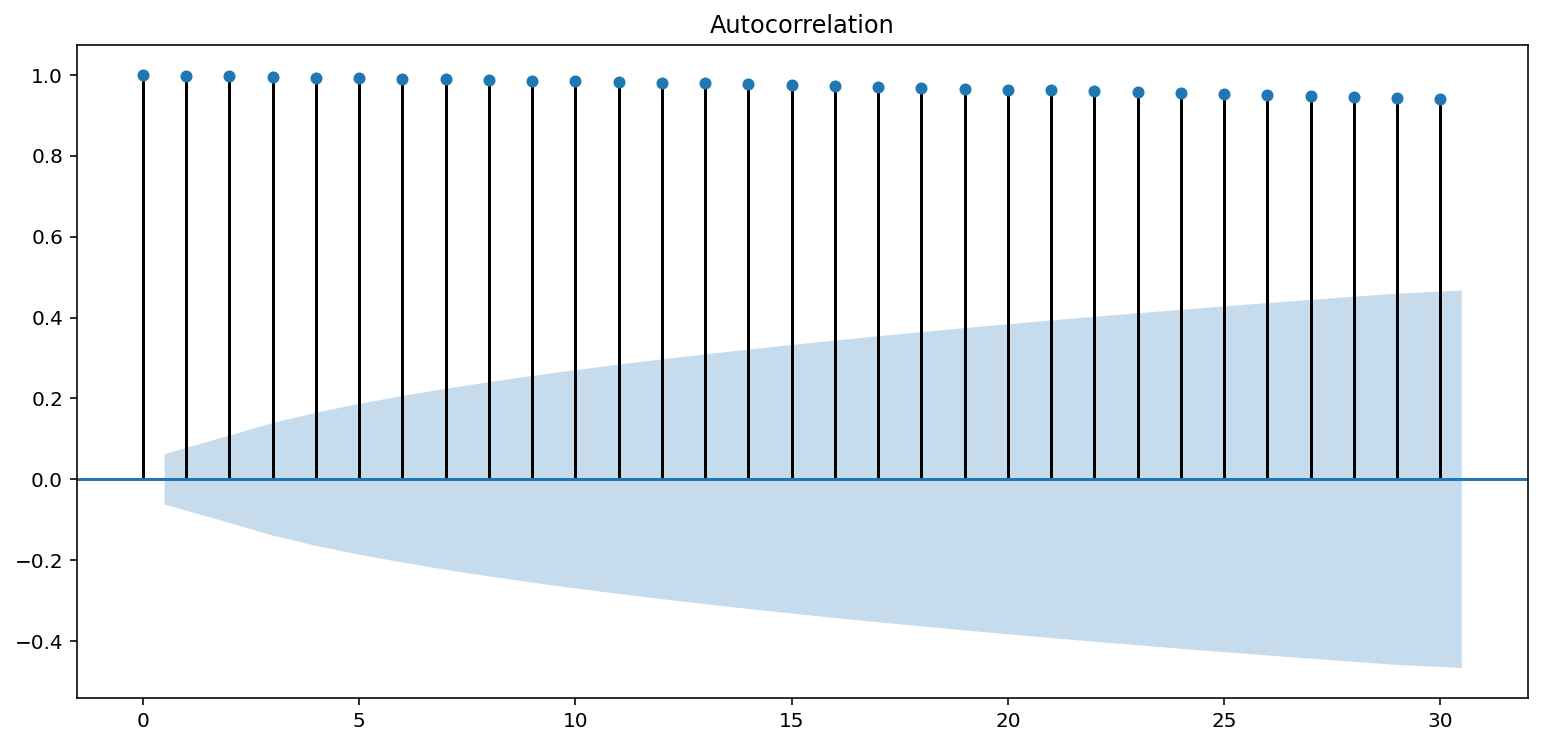

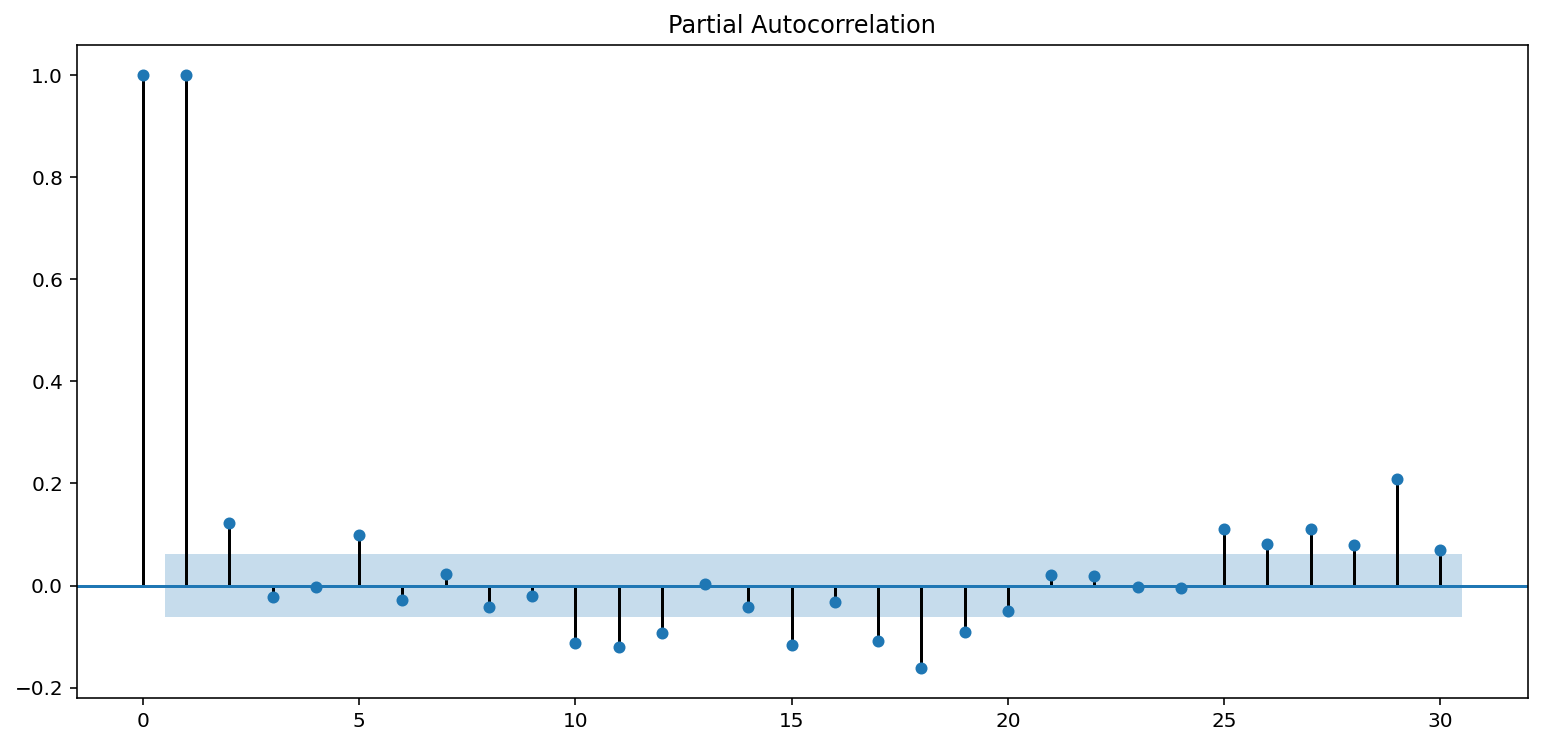

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(adj_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(adj_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Volume 데이터는 주식 거래량으로 시간에 따라 거의 변화가 크지 않아서 log를 안 하여도 다음과 같은 결과를 볼 수 있었다.

정상성 데이터를 만들기 위해 1차 차분하고 2차 차분까지 하였다.

Results of Dickey-Fuller Test:
Test Statistic                 -34.633973
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    985.000000
Critical Value (1%)             -3.437006
Critical Value (5%)             -2.864479
Critical Value (10%)            -2.568335
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.429457e+01
p-value                        1.258842e-26
#Lags Used                     1.600000e+01
Number of Observations Used    9.680000e+02
Critical Value (1%)           -3.437123e+00
Critical Value (5%)           -2.864530e+00
Critical Value (10%)          -2.568362e+00
dtype: float64


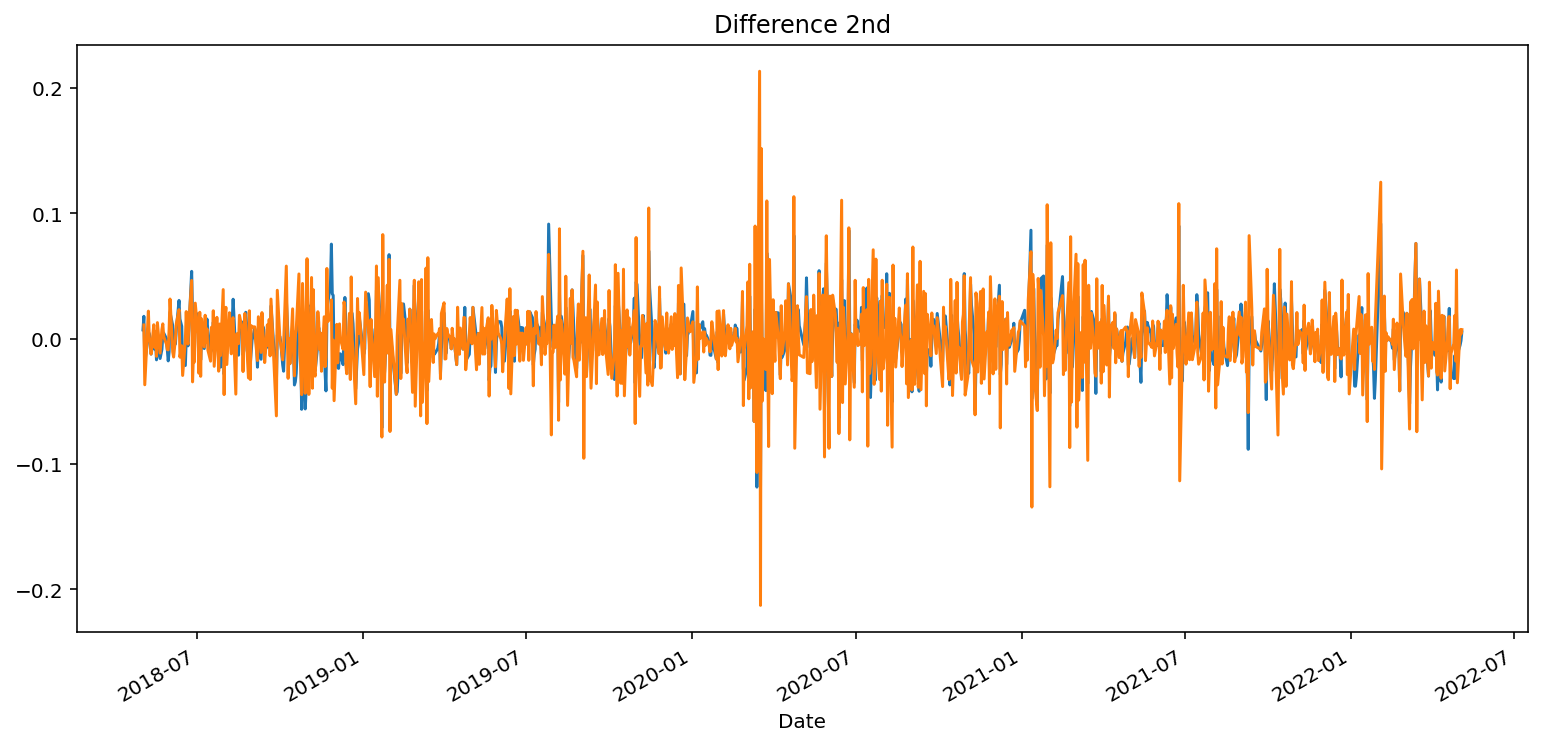

In [27]:
# 1차 차분 구하기
diff_1 = open_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

Results of Dickey-Fuller Test:
Test Statistic                -5.738659e+00
p-value                        6.350630e-07
#Lags Used                     1.600000e+01
Number of Observations Used    9.690000e+02
Critical Value (1%)           -3.437116e+00
Critical Value (5%)           -2.864527e+00
Critical Value (10%)          -2.568361e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.563506e+01
p-value                        1.666997e-28
#Lags Used                     1.500000e+01
Number of Observations Used    9.690000e+02
Critical Value (1%)           -3.437116e+00
Critical Value (5%)           -2.864527e+00
Critical Value (10%)          -2.568361e+00
dtype: float64


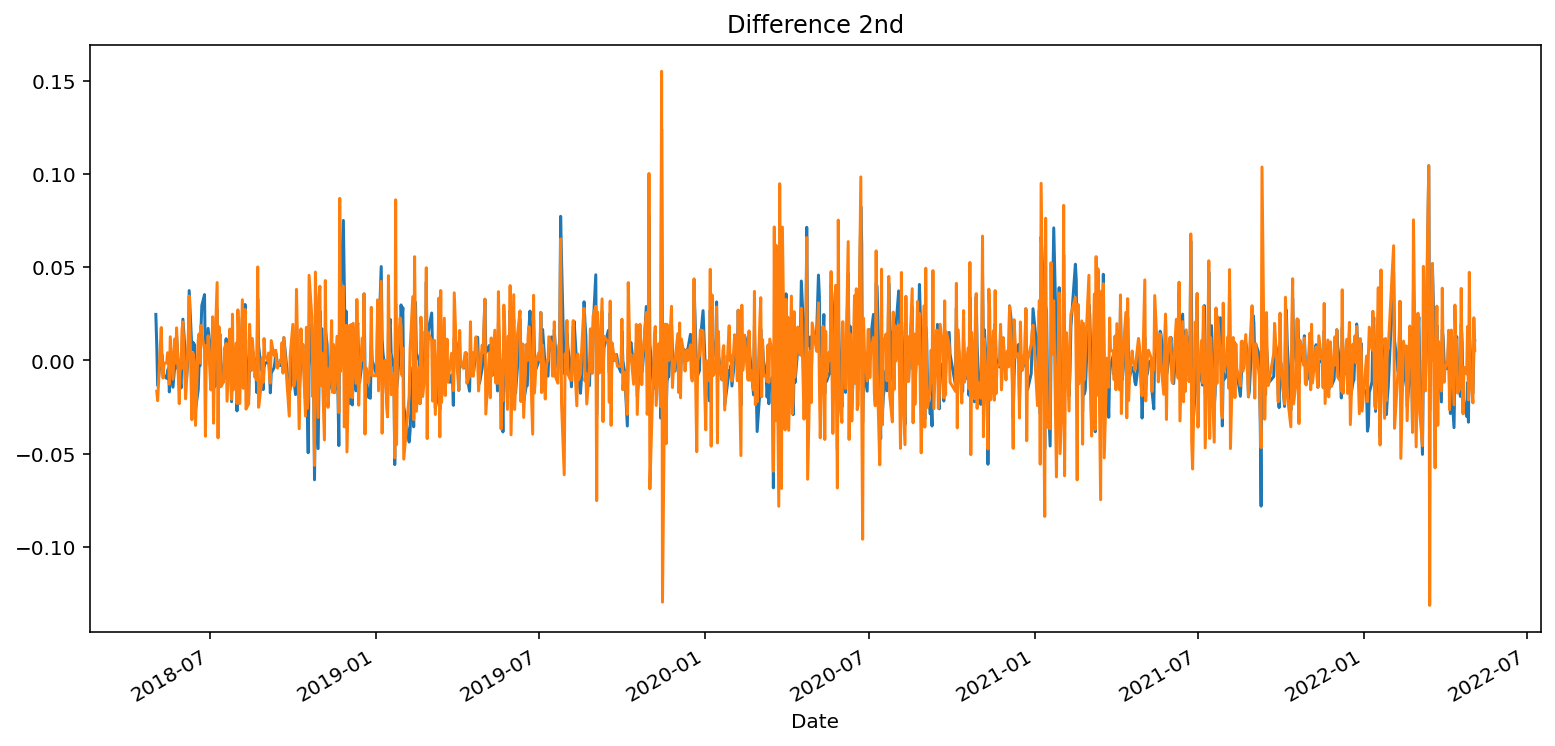

In [28]:
# 1차 차분 구하기
diff_1 = high_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

Results of Dickey-Fuller Test:
Test Statistic                 -30.786699
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    985.000000
Critical Value (1%)             -3.437006
Critical Value (5%)             -2.864479
Critical Value (10%)            -2.568335
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.524396e+01
p-value                        5.117088e-28
#Lags Used                     1.500000e+01
Number of Observations Used    9.690000e+02
Critical Value (1%)           -3.437116e+00
Critical Value (5%)           -2.864527e+00
Critical Value (10%)          -2.568361e+00
dtype: float64


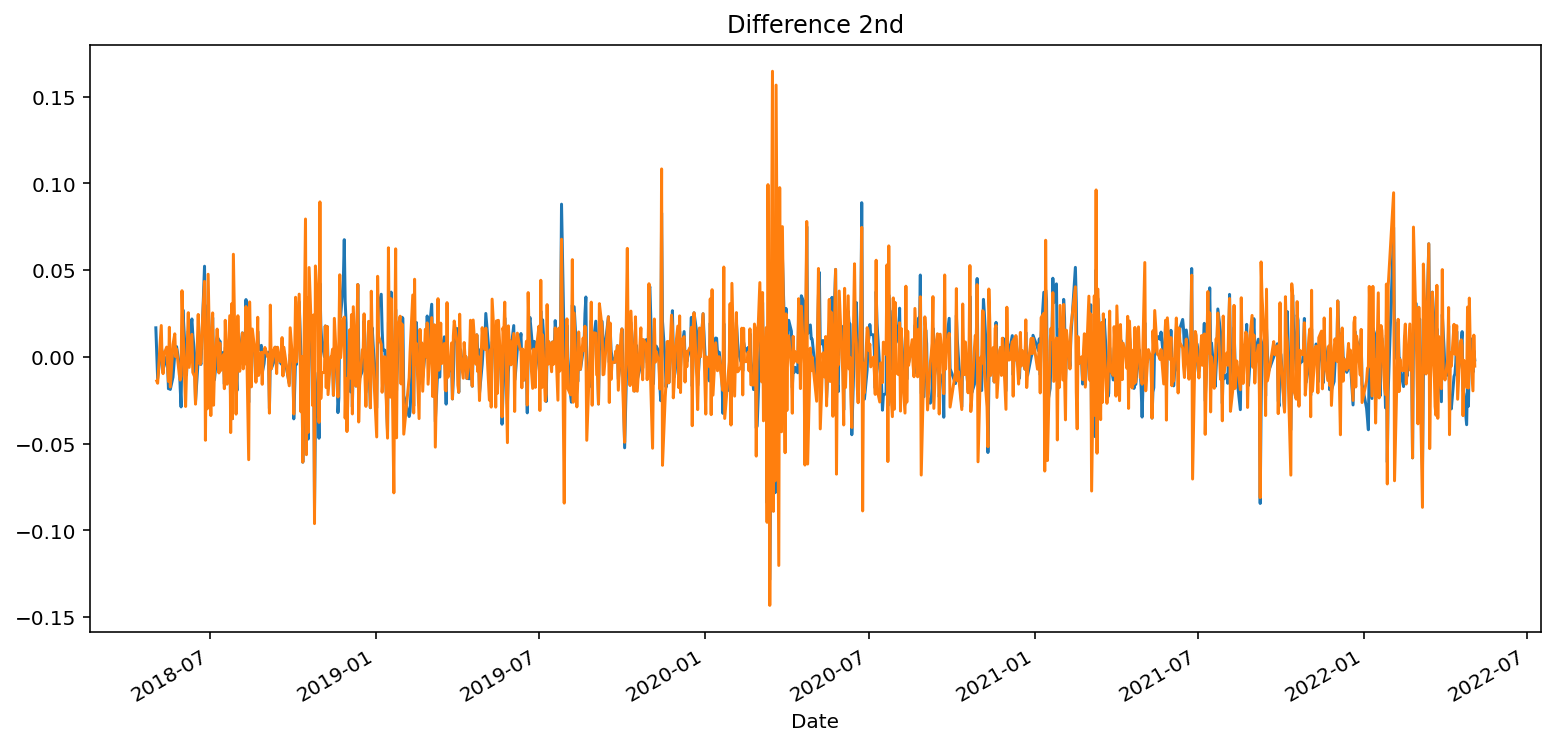

In [29]:
# 1차 차분 구하기
diff_1 = low_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

Results of Dickey-Fuller Test:
Test Statistic                 -32.998339
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    985.000000
Critical Value (1%)             -3.437006
Critical Value (5%)             -2.864479
Critical Value (10%)            -2.568335
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.428964e+01
p-value                        1.282134e-26
#Lags Used                     1.600000e+01
Number of Observations Used    9.680000e+02
Critical Value (1%)           -3.437123e+00
Critical Value (5%)           -2.864530e+00
Critical Value (10%)          -2.568362e+00
dtype: float64


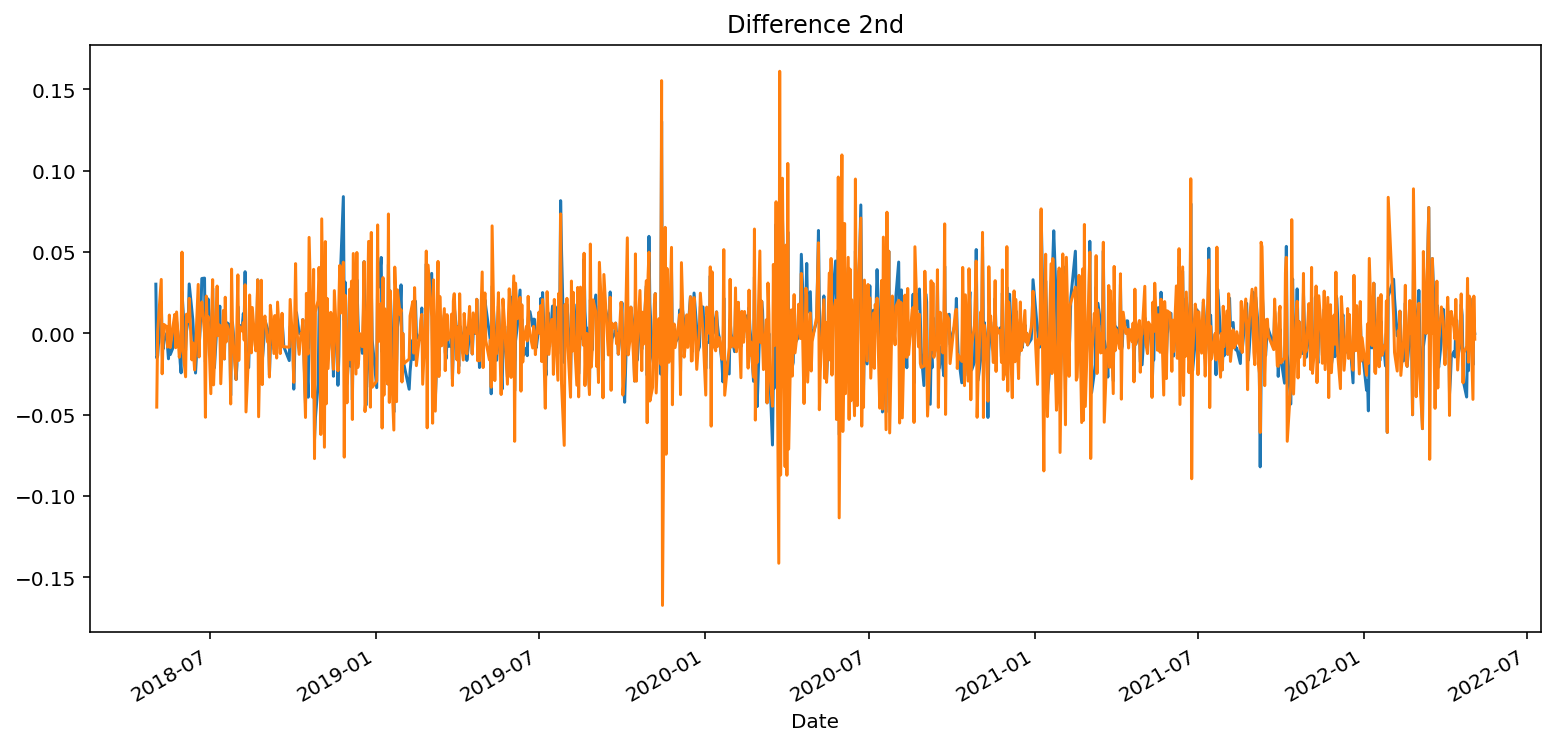

In [30]:
# 1차 차분 구하기
diff_1 = close_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

Results of Dickey-Fuller Test:
Test Statistic                 -33.000891
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    985.000000
Critical Value (1%)             -3.437006
Critical Value (5%)             -2.864479
Critical Value (10%)            -2.568335
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.427888e+01
p-value                        1.334554e-26
#Lags Used                     1.600000e+01
Number of Observations Used    9.680000e+02
Critical Value (1%)           -3.437123e+00
Critical Value (5%)           -2.864530e+00
Critical Value (10%)          -2.568362e+00
dtype: float64


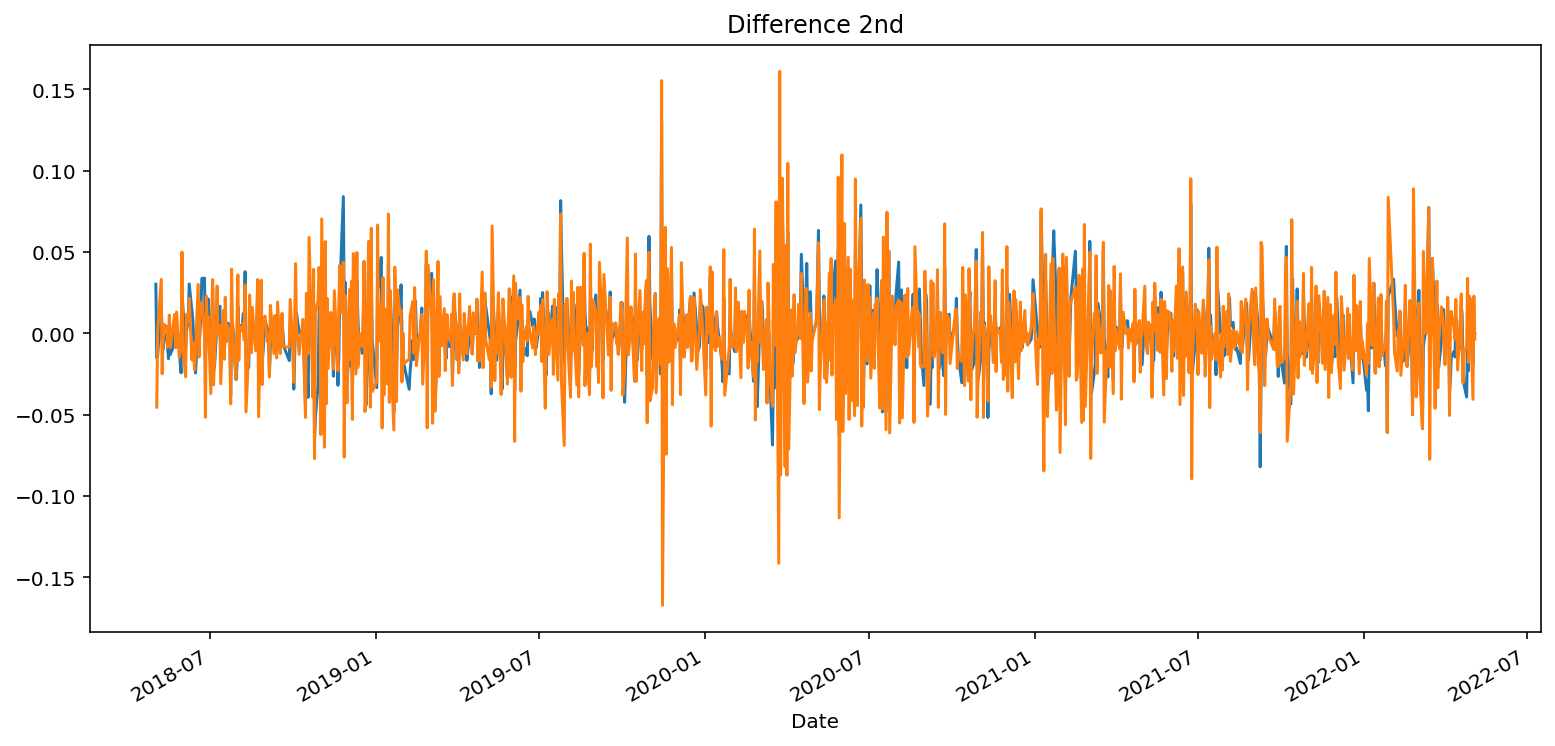

In [31]:
# 1차 차분 구하기
diff_1 = adj_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

6. ARIMA 모델 훈련과 테스트

In [47]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data_o, order=(4, 0, 1))
fitted_m = model.fit() 

print(fitted_m.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                   Open   No. Observations:                  888
Model:                     ARMA(4, 1)   Log Likelihood                2096.642
Method:                       css-mle   S.D. of innovations              0.023
Date:                Thu, 05 May 2022   AIC                          -4179.283
Time:                        05:00:14   BIC                          -4145.761
Sample:                             0   HQIC                         -4166.469
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.5054        nan        nan        nan         nan         nan
ar.L1.Open    -0.0680        nan        nan        nan         nan         nan
ar.L2.Open     0.9456   5.89e-07    1.6e+06      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


ARMA --> order( 4, 0, 1) AR(auto regression) --> 4번쨰, MA(Moving average --> 1) : MA가 2 이상이면 계산이 안됨

In [33]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data_h, order=(4, 0, 1))
fitted_m = model.fit() 

print(fitted_m.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


                              ARMA Model Results                              
Dep. Variable:                   High   No. Observations:                  888
Model:                     ARMA(4, 1)   Log Likelihood                2226.101
Method:                       css-mle   S.D. of innovations              0.020
Date:                Thu, 05 May 2022   AIC                          -4438.202
Time:                        04:57:48   BIC                          -4404.680
Sample:                             0   HQIC                         -4425.388
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3252      0.353     34.953      0.000      11.634      13.016
ar.L1.High     2.0259      0.000   1.15e+04      0.000       2.026       2.026
ar.L2.High    -1.1022      0.000  -3605.905      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [34]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data_l, order=(2, 0, 1))
fitted_m = model.fit() 

print(fitted_m.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


                              ARMA Model Results                              
Dep. Variable:                    Low   No. Observations:                  888
Model:                     ARMA(2, 1)   Log Likelihood                2216.912
Method:                       css-mle   S.D. of innovations              0.020
Date:                Thu, 05 May 2022   AIC                          -4423.824
Time:                        04:57:51   BIC                          -4399.879
Sample:                             0   HQIC                         -4414.671
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3152      0.382     32.278      0.000      11.567      13.063
ar.L1.Low      1.9654      0.000   7701.725      0.000       1.965       1.966
ar.L2.Low     -0.9655      0.000  -3790.814      0.0

In [35]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data_c, order=(2, 0, 1))
fitted_m = model.fit() 

print(fitted_m.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  888
Model:                     ARMA(2, 1)   Log Likelihood                2135.173
Method:                       css-mle   S.D. of innovations              0.022
Date:                Thu, 05 May 2022   AIC                          -4260.345
Time:                        04:57:54   BIC                          -4236.400
Sample:                             0   HQIC                         -4251.192
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.3403      0.414     29.826      0.000      11.529      13.151
ar.L1.Close     0.7000      0.262      2.671      0.008       0.186       1.214
ar.L2.Close     0.2988      0.262      1.141    

In [36]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data_a, order=(2, 0, 1))
fitted_m = model.fit() 

print(fitted_m.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:              Adj Close   No. Observations:                  888
Model:                     ARMA(2, 1)   Log Likelihood                2134.896
Method:                       css-mle   S.D. of innovations              0.022
Date:                Thu, 05 May 2022   AIC                          -4259.792
Time:                        04:57:56   BIC                          -4235.847
Sample:                             0   HQIC                         -4250.639
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.3364      0.417     29.618      0.000      11.520      13.153
ar.L1.Adj Close     0.7024      0.259      2.714      0.007       0.195       1.210
ar.L2.Adj Close     0.2964      

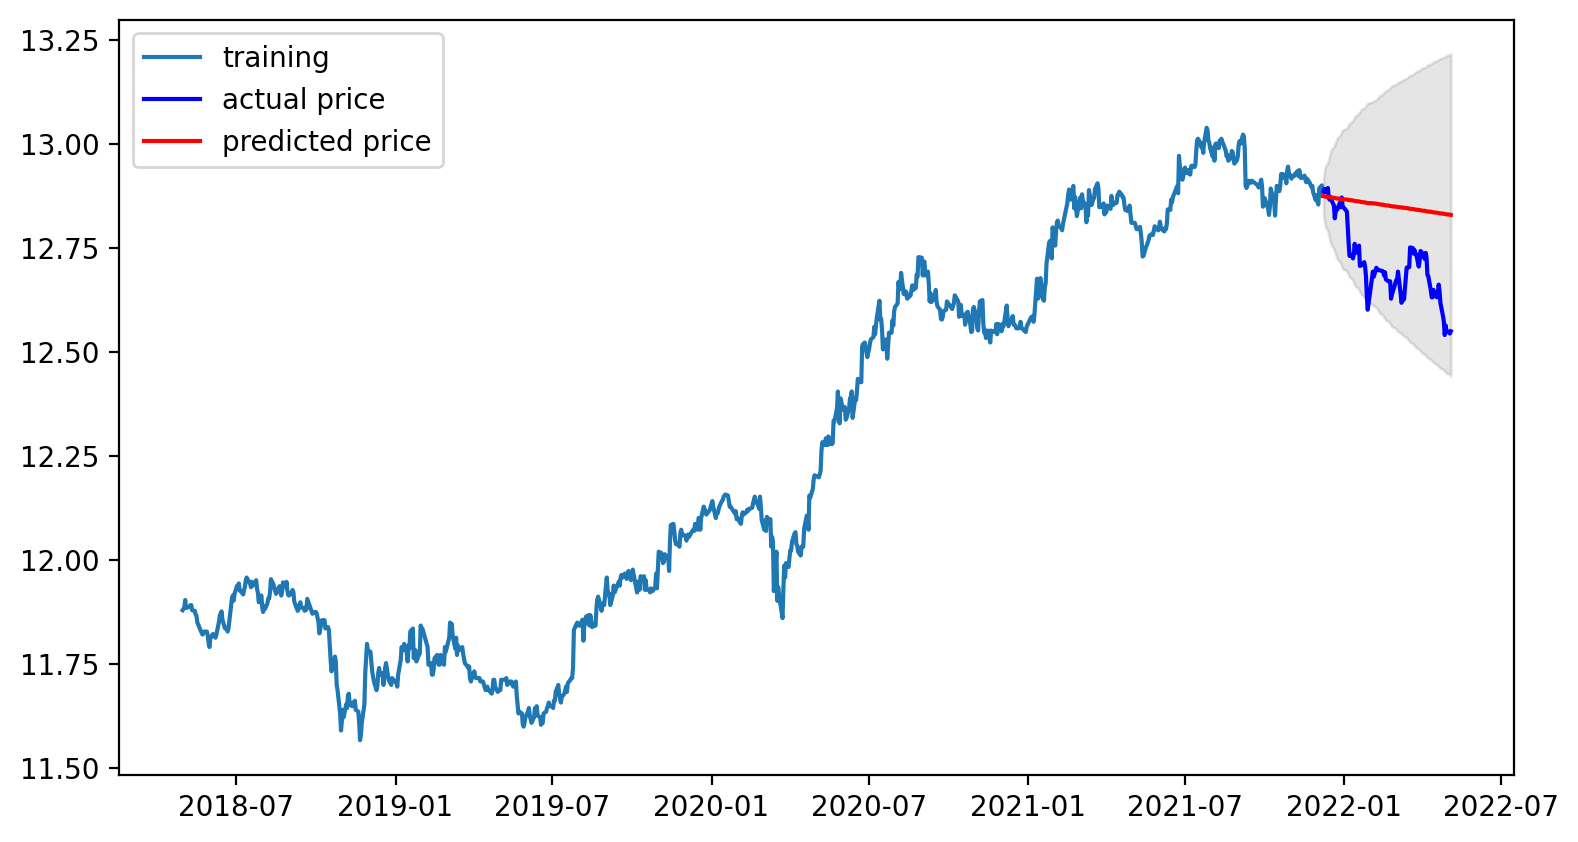

In [37]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data_o), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data_o.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data_o.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data_o.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data_o, label='training')
plt.plot(test_data_o, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

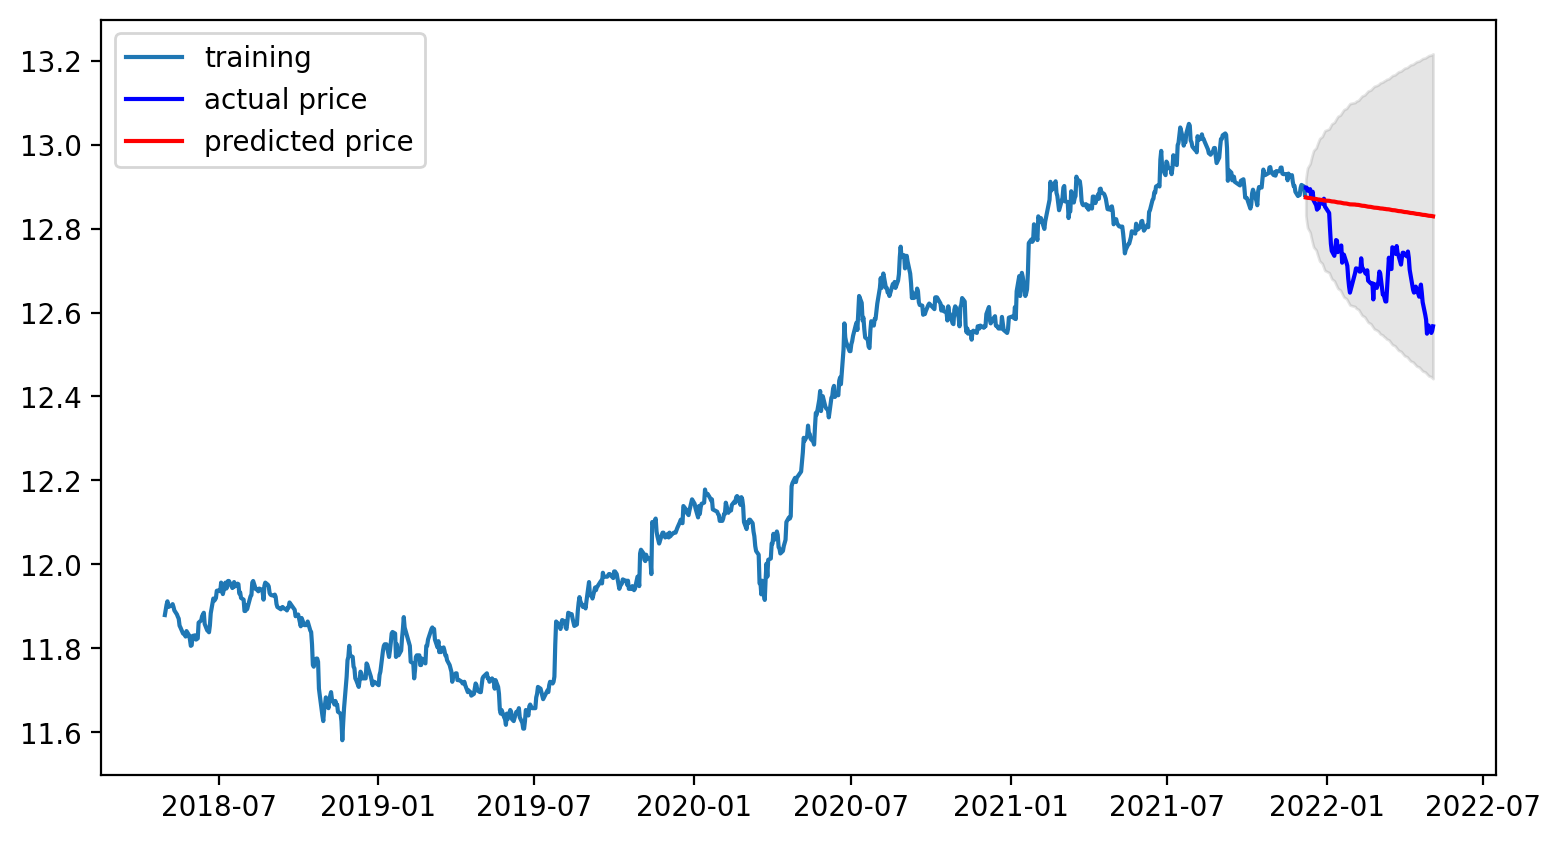

In [38]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data_h), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data_h.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data_h.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data_h.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data_h, label='training')
plt.plot(test_data_h, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

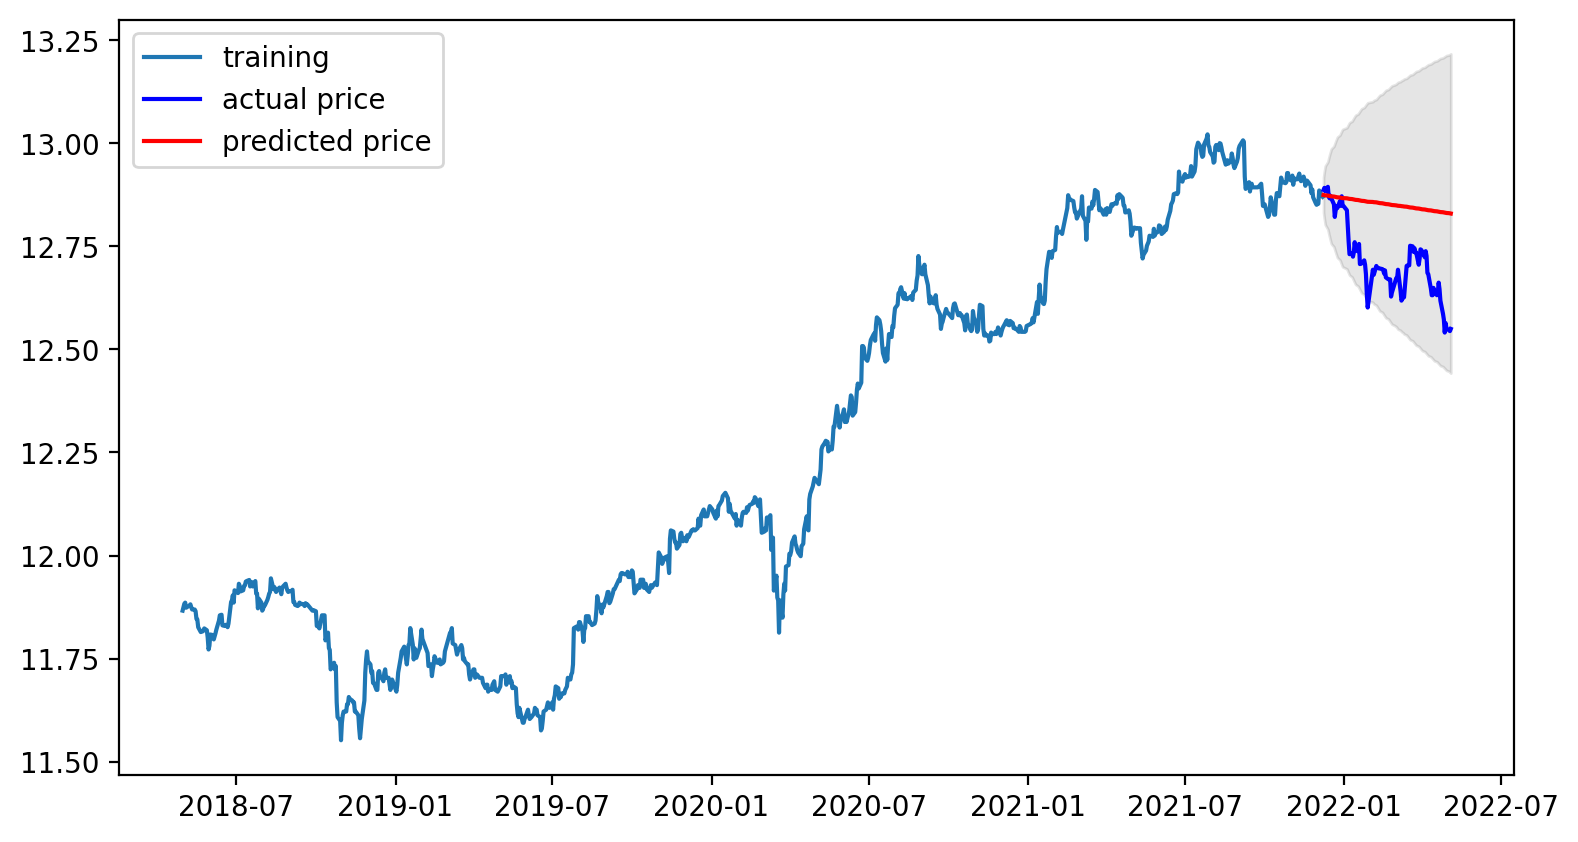

In [39]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data_l), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data_l.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data_l.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data_l.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data_l, label='training')
plt.plot(test_data_o, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

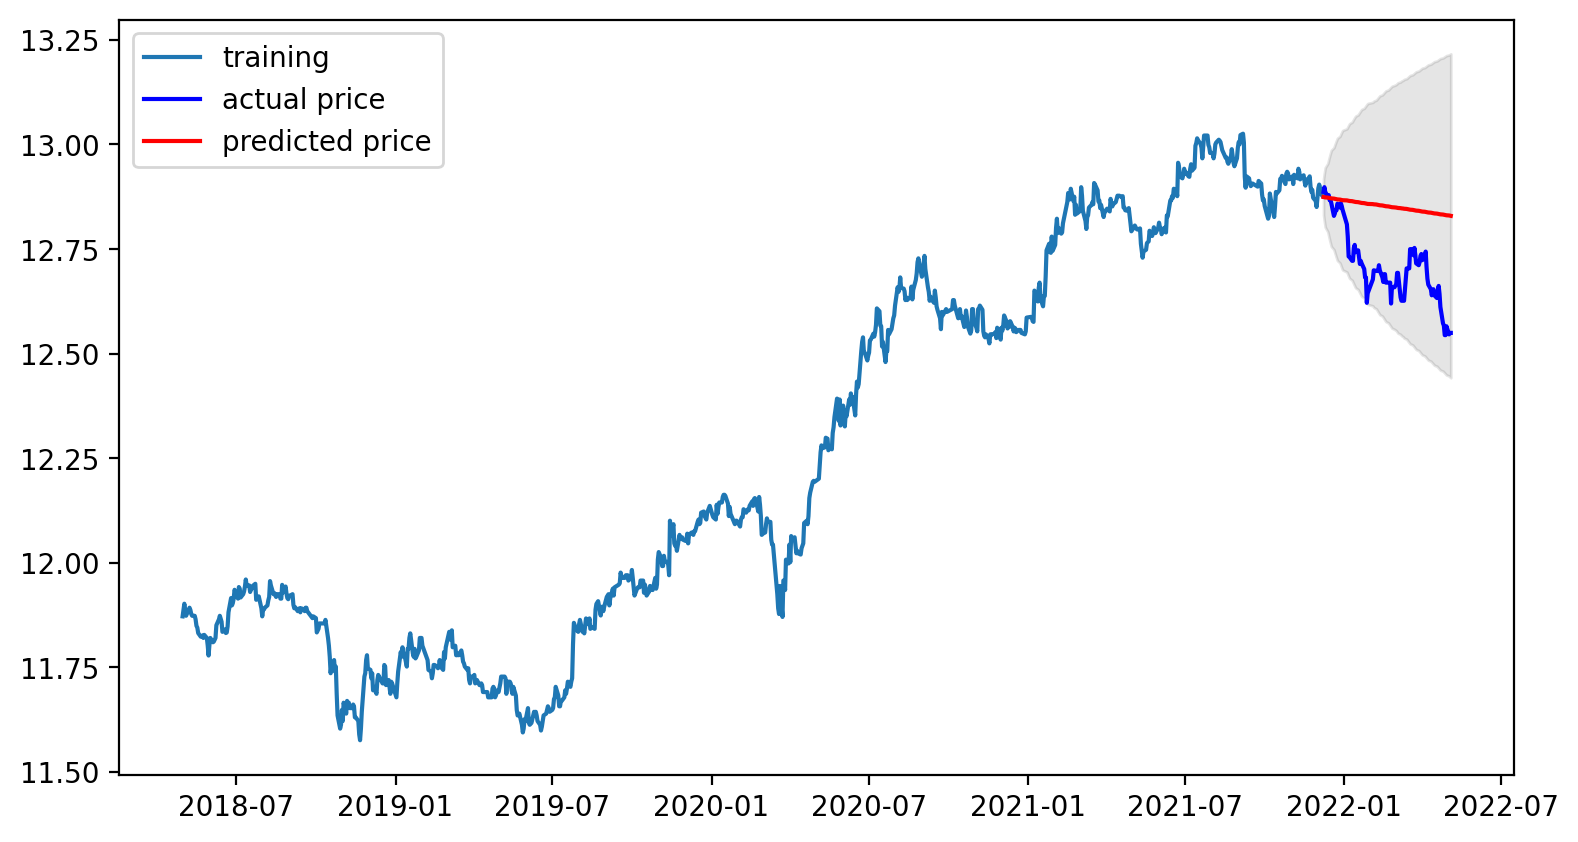

In [40]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data_c), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data_c.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data_c.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data_c.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data_c, label='training')
plt.plot(test_data_c, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

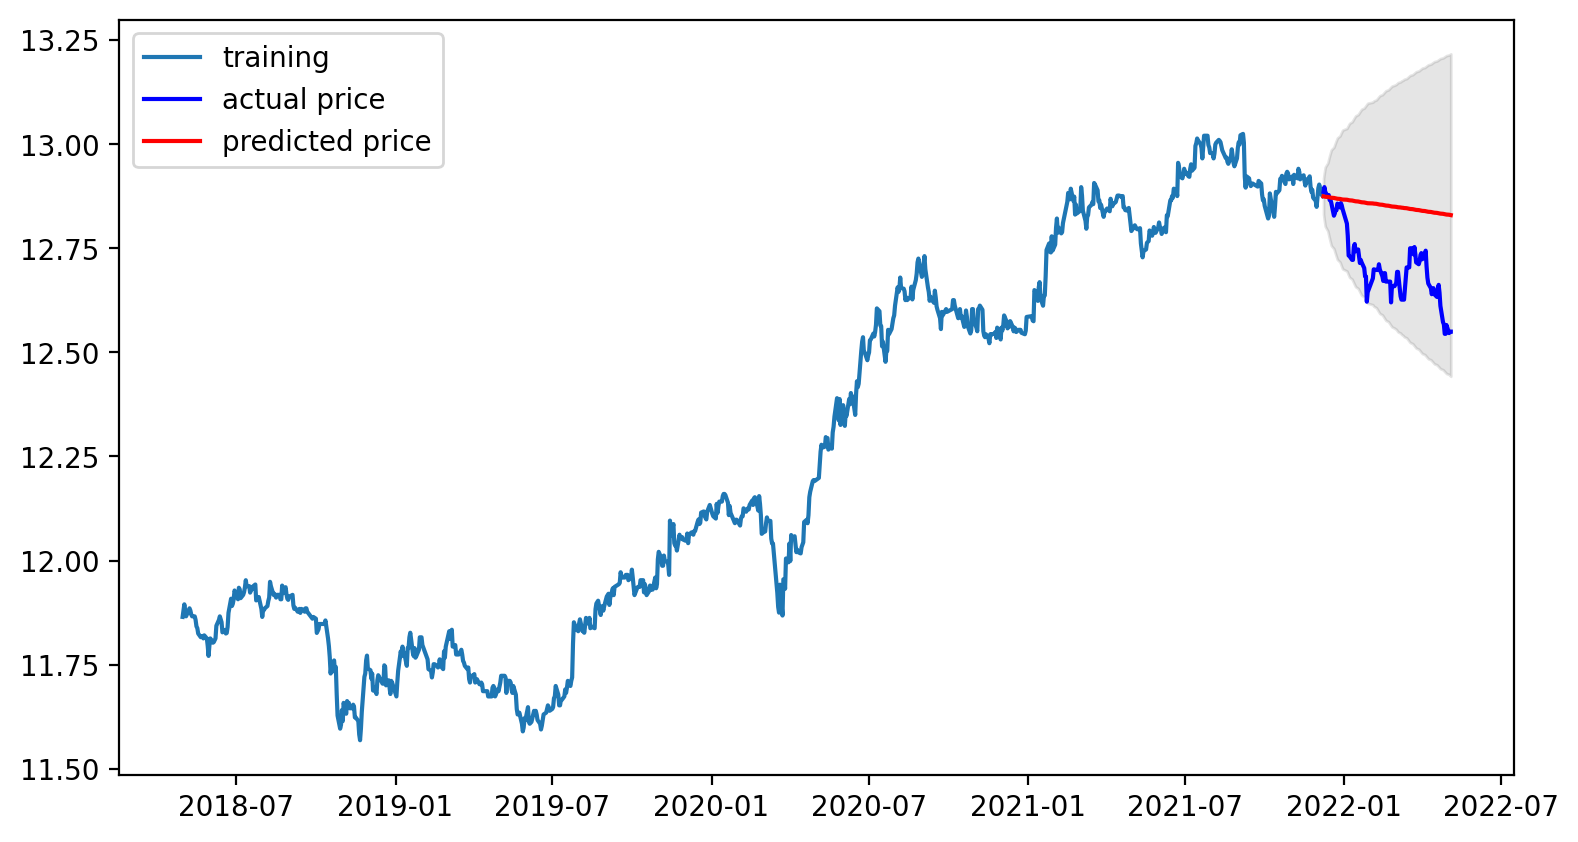

In [41]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data_a), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data_a.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data_a.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data_a.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data_a, label='training')
plt.plot(test_data_a, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

volume 데이터는 거래량을 의미하는 데 비교적 다른 데이터에 비해 정상적인 데이터이지만 예측 데이터와 실제 데이터가 너무 많은 차이가 존재한다.

주식 데이터에는 시작시 주식데이터(open), 마감시(close), 그 날 주식의 높고 낮을(high, low) 시 데이터, adj(조정 종가 : ajusted closing price) 그리고 volume(거래량)이 있다.
거래량은 거의 변화가 없다.
나머지 데이터는 거의 유사하게 나오는 것을 알 수 있어다.
시계열 방식의 다른 예제를 보면 주기성이 보이지만 삼성주식과 현대 자동차 주식으로 하였는데 주기성이 거의 보이지 않았다.
시계열 방식의 두가지 조건이 있다.
1. 과거의 데이터에 일정한 패턴이 발견된다.
2. 과거의 패턴은 미래에도 동일하게 반복될 것이다.

위의 조건으로 보면 삼성과 현대차는 적합하지 않는 데이터이다. 
이해를 못하는 부분도 있는 것 같고 좀 더 고민해야 할 부분인 것으로 보인다.

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data_o), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data_o), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data_o), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data_o))/np.abs(np.exp(test_data_o)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  2996103963.0058484
MAE:  48783.36795223064
RMSE:  54736.67840676714
MAPE: 15.39%


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data_h), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data_h), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data_h), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data_h))/np.abs(np.exp(test_data_h)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  2706073028.2631516
MAE:  46147.10234945804
RMSE:  52019.92914511853
MAPE: 14.44%


In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data_l), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data_l), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data_l), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data_l))/np.abs(np.exp(test_data_l)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  3313542533.5717473
MAE:  51869.99454302928
RMSE:  57563.378406515956
MAPE: 16.49%


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data_c), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data_c), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data_c), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data_c))/np.abs(np.exp(test_data_c)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  3012666290.8130813
MAE:  49163.52236134459
RMSE:  54887.76084714224
MAPE: 15.51%


In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data_a), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data_a), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data_a), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data_a))/np.abs(np.exp(test_data_a)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  3013189560.6563296
MAE:  49188.23669215267
RMSE:  54892.527366266615
MAPE: 15.51%


종전 종가인 adj 데이터가 MAPE 값이 가장 낮은 3.66%로 보여주고 있다. 